# Lead Scoring Case Study

*  By - Sabyasachi Parida

# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

# Objectives

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


# Steps to be carried out
1. Read and inspect the data .
2. Data Cleaning , Outlier analysis and Outlier Treatment
3. Exploratory Data Analysis
4. Data Preparation
5. Model Bulding
6. Model Evaluation Matrix
7. ROC Curve
8. Finding Optimal Cutoff Point
9. Final prediction based on 0.34 cut-off
10. Making predictions on test data
11. Creating the Final dataset & add the lead score 
12. Determining Feature Importance of Final Model
13. Conclusion 

In [1]:
## Import the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show the Interactive mode.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

# 1.Read and inspect the data 

## 1.1 Read the data 

In [2]:
#import the data 
Leads_df = pd.read_csv(r"D:\Data Science\Logistic Regression\Lead+Scoring+Case+Study\Leads.csv")
Leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inference
- In columns lead profile, city etc. we can observer values as Select. Which means the customer didnt select anything 

In [3]:
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
Leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.2 Check duplicates for Prospect ID ,Lead Number


In [5]:
#checking duplicates of Prospect ID
print(sum(Leads_df.duplicated(subset = 'Prospect ID')) == 0)
# No duplicate values

True


In [6]:
#checking duplicates of Lead Number
print(sum(Leads_df.duplicated(subset = 'Lead Number')) == 0)
# No duplicate values

True


In [7]:
##Prospect ID and Lead Number have the same number of unique values
## Hence droping Prospect ID.
Leads_df = Leads_df.drop(['Prospect ID'], axis = 1)

# 2. Data Cleaning , Outlier analysis and Outlier Treatment

## 2.1 Generic function to remove rows or columns based on parameter provided 

In [8]:
def removeNulls(dataframe , axis=1, percentage=0.3):
    '''
    it will remove rows or columns based on the input provided 
    dataframe = name of dataframe 
    axis =1 default for columns , if rows are required we would need to pass 0 
    
    default percentage check is 30%
    
    '''
    df= dataframe.copy()
    ishape = df.shape
    if axis==0:
        rownames= df.transpose().isnull().sum()
        rownames= list(rownames[rownames.values > percentage*len(df)].index)
        print(rownames)
        df.drop(df.index[rownames],inplace=True)
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames=(df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percentage].index)
        print(colnames)
        df.drop(labels = colnames,axis =1,inplace=True)   
        print("\nNumber of Columns dropped\t: ",len(colnames))
    
    print("\nPrevious Shape -",ishape,"\nNew Shape",df.shape)
    return df

## 2.2 Replace Select with Null 


In [9]:
Leads_df = Leads_df.replace ('Select',np.nan ) 

In [10]:
Leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2.3 Check the null percentage

In [11]:
((Leads_df.isnull().sum()/len(Leads_df))*100).to_frame()

,0
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684
Last Activity,1.114719


## 2.4 Delete the columns which have more than 45 %  Nulls

In [12]:
## Deleteing columns which are having more than 45% null values as 45 % is is large enough to influence the prediction.
Leads_df= removeNulls(Leads_df , axis=1, percentage=0.45) ## Using usier defined function for the operation

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

Number of Columns dropped	:  7

Previous Shape - (9240, 36) 
New Shape (9240, 29)


In [13]:
# Dropping Tags variable as the scoring variable 
# and it is meant for marketing team and not suitable for prediction.
Leads_df = Leads_df.drop(['Tags'], axis = 1) 

In [14]:
null_counts = round(100*(Leads_df.isnull().sum()/len(Leads_df.index)), 2)
null_counts

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

## 2.5 Describe Each column

In [15]:
## Describe each column just to inspect uniquness ,mean etc  
for column in Leads_df.columns:
    l=len("*********"+column+"*******")
    print("*"*l)
    print("*********"+column+"*******")
    print("*"*l)
    print(Leads_df[column].describe())
    print("*"*l)



***************************
*********Lead Number*******
***************************
count      9240.000000
mean     617188.435606
std       23405.995698
min      579533.000000
25%      596484.500000
50%      615479.000000
75%      637387.250000
max      660737.000000
Name: Lead Number, dtype: float64
***************************
***************************
*********Lead Origin*******
***************************
count                        9240
unique                          5
top       Landing Page Submission
freq                         4886
Name: Lead Origin, dtype: object
***************************
***************************
*********Lead Source*******
***************************
count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object
***************************
****************************
*********Do Not Email*******
****************************
count     9240
unique       2
top         No
freq      8506
Name: Do Not Email, dtype: ob

### Inferences
- We can observe that Prospect ID and Lead Number have unique values we can use any one of these columns to uniquely identify
  any lead.Hence the Prospect Id was dropped 

## 2.6 Delete rows which have more than 70% nulls

In [16]:
Leads_df= removeNulls(Leads_df , axis=0, percentage=0.7)
Leads_df.head()

[]

Number of Rows dropped	:  0

Previous Shape - (9240, 28) 
New Shape (9240, 28)


,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


### Inferences
- No rows were dropped 

## 2.7 Analysing and Treating Categorical Values 

User defined function to analyze the categorical variables and group them if the valur is less than 5 %

In [17]:
def Segrigate (Val,threshold =0.06):
    
    Leads_df[Val].value_counts(dropna=False,normalize=True)
    plt.figure(figsize=(7, 7))
    count_df= Leads_df[Val].value_counts(dropna=False,normalize=True)
    count_df=count_df.to_frame()
    count_df=count_df[count_df[Val]<threshold]
    to_replace= count_df.index
    to_replace
    Leads_df[Val] = Leads_df[Val].replace(to_replace, 'Others')
    Leads_df[Val].value_counts(dropna=False,normalize=True).plot(kind='bar',color='mediumslateblue',legend=True,fontsize=11,grid=True);

### Lead Origin

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

After Segrigation:


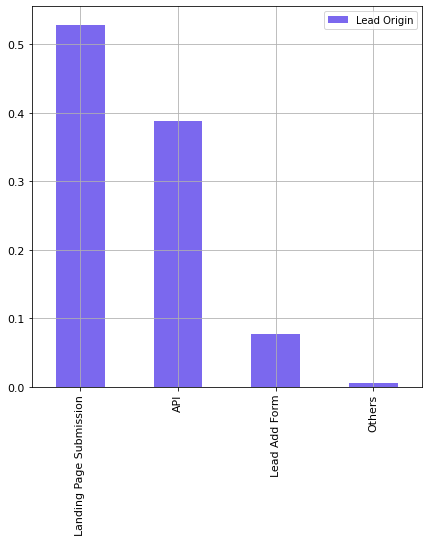

In [18]:
Leads_df['Lead Origin'].value_counts(dropna=False,normalize=True)
print ("After Segrigation:")
Segrigate('Lead Origin')

#### Inferences 
- As we can observe Lead Add Form,Lead Import,Quick Add Form have 0.5%,0.01 % of the present values we can put that into the 
 same category, 'Others' 

###  Lead Source

Google               0.310931
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
WeLearn              0.000108
blog                 0.000108
testone              0.000108
Pay per Click Ads    0.000108
NC_EDM               0.000108
welearnblog_Home     0.000108
youtubechannel       0.000108
Name: Lead Source, dtype: float64

After Segrigation:


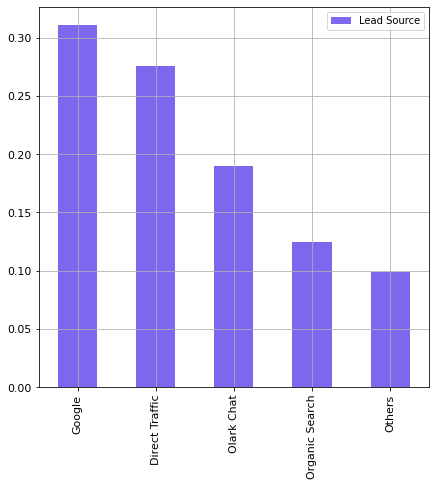

In [19]:
Leads_df['Lead Source'] = Leads_df['Lead Source'].replace('google', 'Google')
Leads_df['Lead Origin'] = Leads_df['Lead Origin'].replace('welearnblog_Home', 'WeLearn')
Leads_df['Lead Source'].value_counts(dropna=False,normalize=True)
print ("After Segrigation:")
Segrigate('Lead Source')

#### Inferences
- Most of the lead source came from Google , followed by Followed by Direct Traffic and Olark Chat ...

###  Last Activity

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Marked Spam               0.000216
Email Received                  0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

After Segrigation:


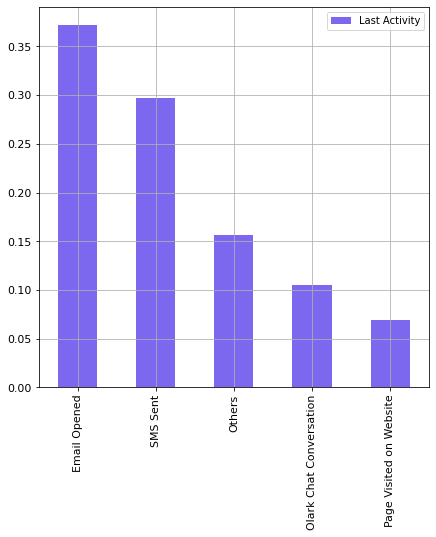

In [20]:
Leads_df['Last Activity'].value_counts(dropna=False,normalize=True)
print ("After Segrigation:")
Segrigate('Last Activity')

#### Inferences
- Most of the Activities include Email opened followed by sms sent 
- We will be dropping the column -Last Notable Activity as both of these columns have similar values and last notable activity was updated by the sales team 

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Form Submitted on Website       0.000108
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64

After Segrigation:


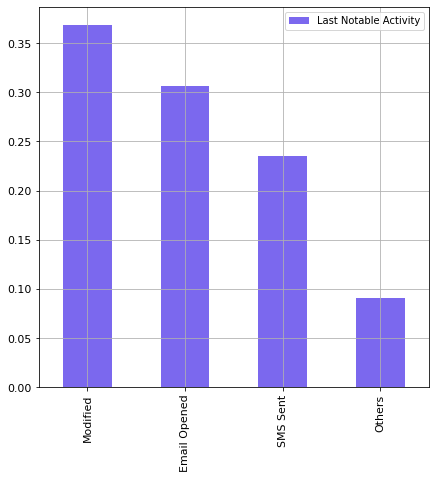

In [21]:
#Leads_df.drop('Last Notable Activity',axis =1,inplace = True)
Leads_df['Last Notable Activity'].value_counts(dropna=False,normalize=True)
print ("After Segrigation:")
Segrigate('Last Notable Activity')

### City

In [22]:
Leads_df.loc[Leads_df['City'] == 'Mumbai', 'Country'] = 'India'
Leads_df.loc[Leads_df['City'] == 'Other Cities of Maharashtra', 'Country'] = 'India'
Leads_df.loc[Leads_df['City'] == 'Thane & Outskirts', 'Country'] = 'India'


NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

After Segrigation:


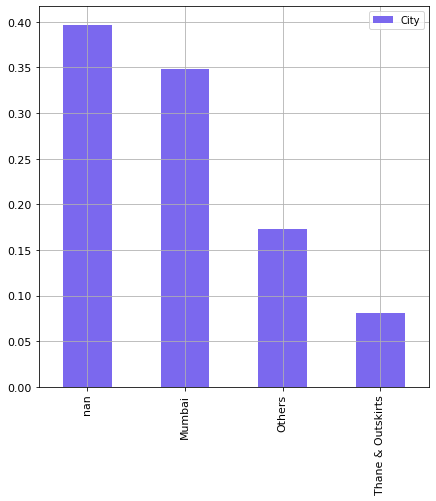

In [23]:
Leads_df['City'].value_counts(dropna=False,normalize=True)
print ("After Segrigation:")
Segrigate('City',0.08)

### Inferences 
- About 35 % data belogs to Mumbai
- Almost 40% Data is null we can create another category here 


In [24]:
Leads_df['City'].fillna('Not Selected',inplace=True)
Leads_df['City'].value_counts(dropna=False,normalize = True)

Not Selected         0.397078
Mumbai               0.348701
Others               0.172835
Thane & Outskirts    0.081385
Name: City, dtype: float64

### Country

India                   0.753571
NaN                     0.230195
United Arab Emirates    0.003463
United States           0.003139
Singapore               0.001407
Saudi Arabia            0.001190
Qatar                   0.000541
unknown                 0.000541
United Kingdom          0.000541
Nigeria                 0.000433
France                  0.000433
Australia               0.000433
Oman                    0.000433
South Africa            0.000433
Hong Kong               0.000325
Bahrain                 0.000325
Sweden                  0.000216
Bangladesh              0.000216
Asia/Pacific Region     0.000216
Kuwait                  0.000216
Ghana                   0.000216
Uganda                  0.000216
Italy                   0.000216
Tanzania                0.000108
Sri Lanka               0.000108
Germany                 0.000108
Russia                  0.000108
Kenya                   0.000108
Liberia                 0.000108
Canada                  0.000108
Denmark   

After Segrigation:


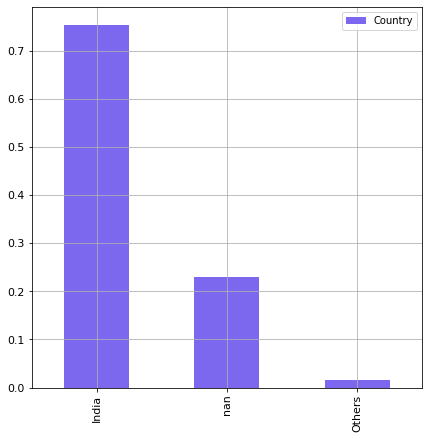

In [25]:
Leads_df['Country'].value_counts(dropna=False,normalize=True)
print ("After Segrigation:")
Segrigate('Country')

As we can see that more than 70% country selected is India. We can impute the null values with India 

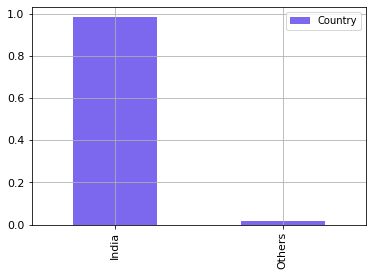

In [26]:
Leads_df['Country'].fillna('India',inplace=True) #India
Leads_df['Country'].value_counts(dropna=False,normalize=True).plot(kind='bar',color='mediumslateblue',legend=True,fontsize=11,grid=True);

### Inferences 
- India has the maximum frequency

### Specialization

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

After Segrigation:


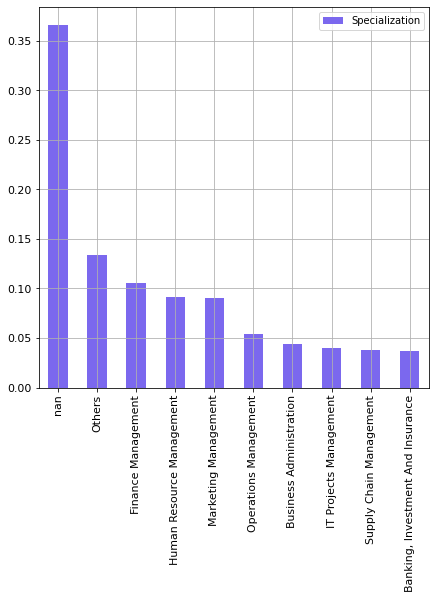

In [27]:
Leads_df['Specialization'].value_counts(dropna=False,normalize=True)
print ("After Segrigation:")
Segrigate('Specialization',0.03)

### Inferences
- The number of Null values is more than 35% 
- We can create a category Not Specified for the same .


In [28]:
Leads_df['Specialization'].fillna('Not specified',inplace=True)
Leads_df['Specialization'].value_counts(dropna=False,normalize=True)

Not specified                        0.365801
Others                               0.134091
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Name: Specialization, dtype: float64

### What is your current occupation

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

After Segrigation:


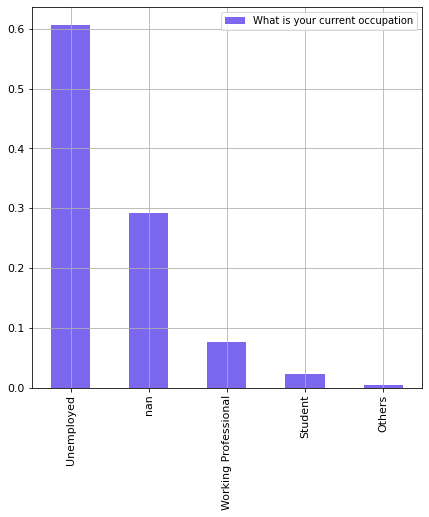

In [29]:
Leads_df['What is your current occupation'].value_counts(dropna=False,normalize=True)
print ("After Segrigation:")
Segrigate('What is your current occupation',0.02)

### Inferences 
- There are almost 30% values which are null.
- We can create a separate category for them .

In [30]:
Leads_df['What is your current occupation'].fillna('Not selected',inplace=True)
Leads_df['What is your current occupation'].value_counts(dropna=False,normalize=True)

Unemployed              0.606061
Not selected            0.291126
Working Professional    0.076407
Student                 0.022727
Others                  0.003680
Name: What is your current occupation, dtype: float64

### What matters most to you in choosing a course

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

After Segrigation:


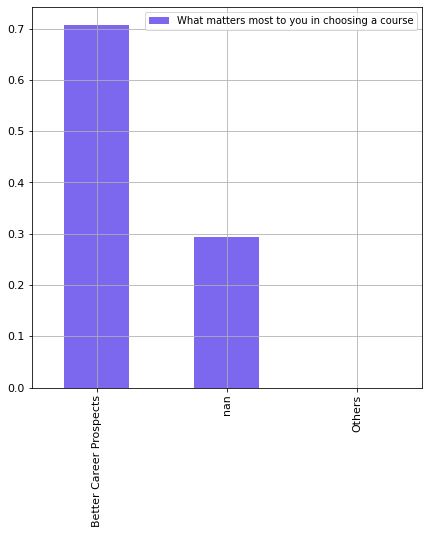

In [31]:
Leads_df['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)
print ("After Segrigation:")
Segrigate('What matters most to you in choosing a course')

### Inferences 
- Better Career prospect counts the most.
- We can create another category for null Values 

In [32]:
Leads_df['What matters most to you in choosing a course'].fillna('Not specified',inplace=True)
Leads_df['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)

Better Career Prospects    0.706494
Not specified              0.293182
Others                     0.000325
Name: What matters most to you in choosing a course, dtype: float64

### Check the Null Percentage of Each Column 

In [33]:
round(100*(Leads_df.isnull().sum()/len(Leads_df.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

## 2.8 Analysing and Treating Numerical Values

In [34]:
Leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


### Outlier Analysis for the Numerical Variables 

### TotalVisits

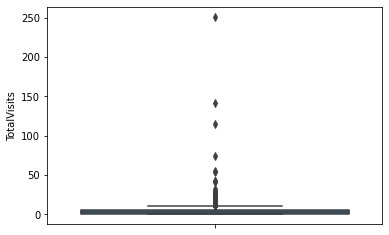

In [35]:
sns.boxplot(y=Leads_df['TotalVisits'])

- If we impute the value with the mean value the it wont be the correct imputation as the mean is affected by few very high values.
- Hence we will impute it with Median value.

In [36]:
Leads_df['TotalVisits'].fillna(Leads_df['TotalVisits'].median(),inplace=True)

### Total Time Spent on Website

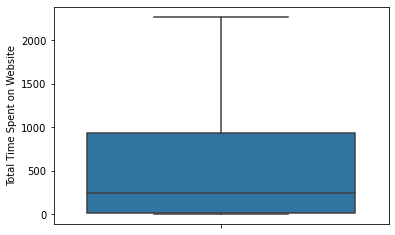

In [37]:
sns.boxplot(y=Leads_df['Total Time Spent on Website'])

### Inference
There are no outliers 

### Page Views Per Visit

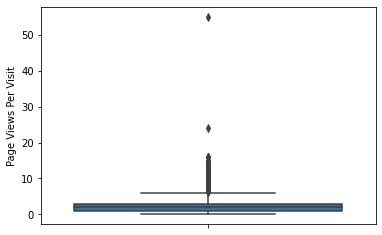

In [38]:
sns.boxplot(y=Leads_df['Page Views Per Visit']);


In [39]:
## Checking mean and median
Leads_df['Page Views Per Visit'].mean()
Leads_df['Page Views Per Visit'].median()

2.3628199494672093

2.0

- If we impute the value with the mean value the it wont be the correct imputation as the mean is affected by few very high values.
- Hence we will impute it with Median value.

In [40]:
Leads_df['Page Views Per Visit'].fillna(Leads_df['Page Views Per Visit'].median(),inplace=True)

as we can see there are a lot of outliers present in TotalVisits and Page Views Per Visit
We would like to do a medium capping for the upper bound capping .
i.e. > 95th percentile will be capped 

In [41]:
## Userdefined function to perform capping

def Capdata(data, x, flg):
    q1 = data[x].quantile(0.05)
    q4 = data[x].quantile(0.95)
    if flg == 0:
        data[x][data[x]<=q1] = q1
    else:
        data[x][data[x]>=q4] = q4

In [42]:
Capdata(Leads_df, 'TotalVisits', 1)
Capdata(Leads_df, 'Page Views Per Visit', 1)

### Box Plot after capping 

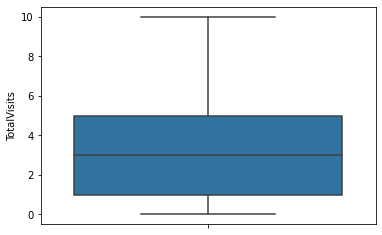

In [43]:
sns.boxplot(y=Leads_df['TotalVisits'])


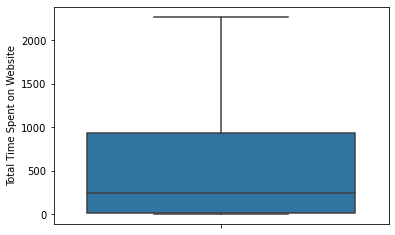

In [44]:
sns.boxplot(y=Leads_df['Total Time Spent on Website'])


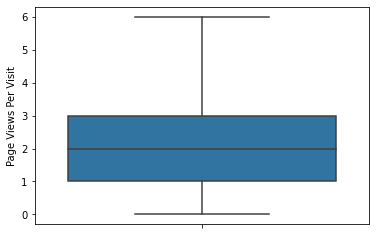

In [45]:
sns.boxplot(y=Leads_df['Page Views Per Visit'])

## 3.Exploratory Data Analysis

#### User defined Function 

In [46]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                numerical(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
                continuous ( 3 ): A horizontal plot would be created 
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="whitegrid")
            
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
        ax[0].set_title("Distribution Plot ")
        sns.distplot(df[col],ax=ax[0],color='green')
       # sns.boxplot(data =df, x=col,ax=ax[0],orient='v',color='green')
        ax[1].set_title("violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile",color='aquamarine',orient='v')
    
    if vartype == 1:
        plt.figure(figsize = (7,5))
        ax=sns.countplot(df[col], hue=hue,palette='Blues_r')
        plt.xlabel(col)
        plt.xticks(rotation=90)
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height())*100/float(len(df.index))), (p.get_x()+0.1, p.get_height()+1))
        
    if vartype==3:
        df[col].value_counts(sort=False).plot(kind='bar',color='coral',legend=True,fontsize=11,grid=True)
        
        
    plt.show()

In [47]:
category_features = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 
                     'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course',
                     'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
                     'Through Recommendations', 'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                     'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque',
                     'A free copy of Mastering The Interview', 'Last Notable Activity']
number_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] # 'Lead Number',

target = ['Converted']

## 3.1 Univariate Analysis

### Categorical Values

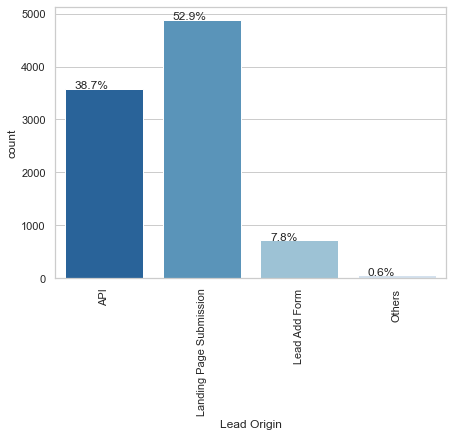

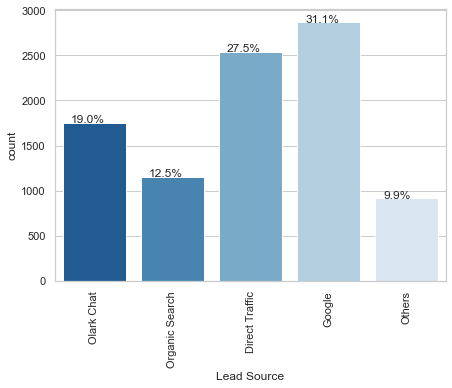

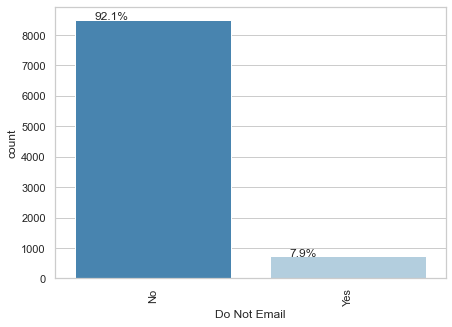

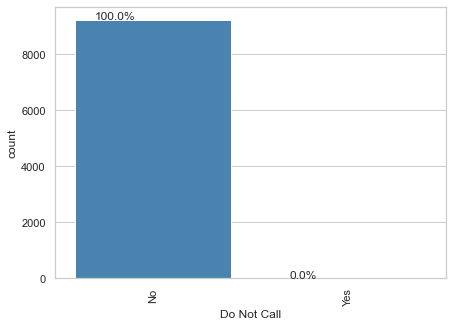

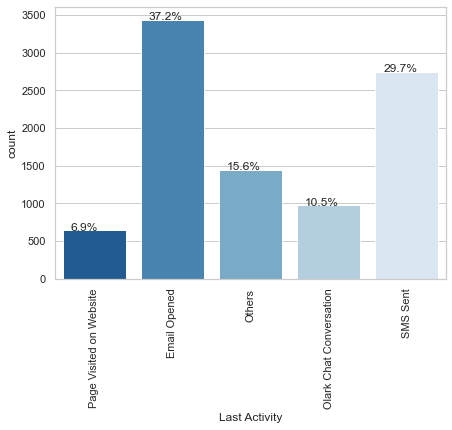

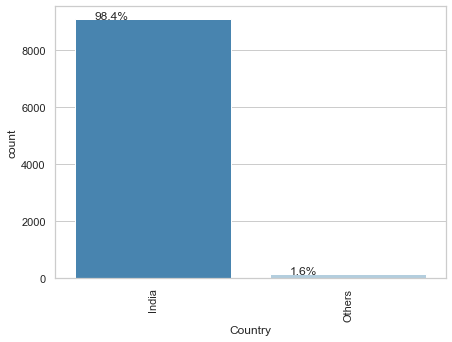

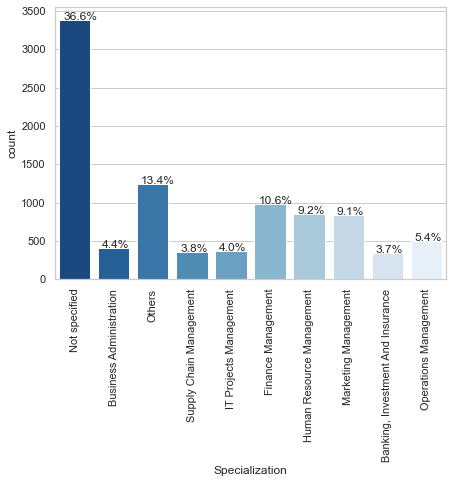

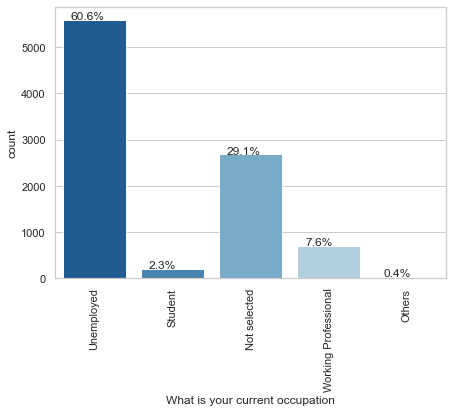

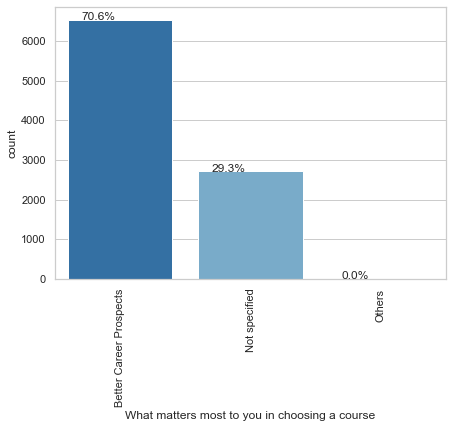

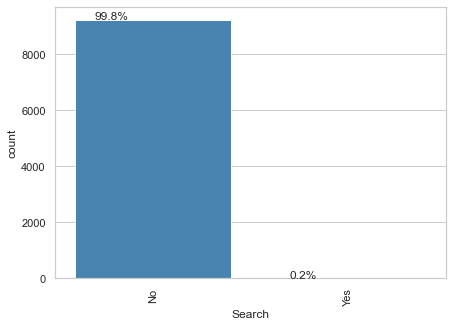

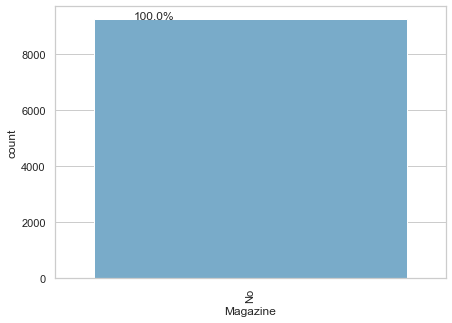

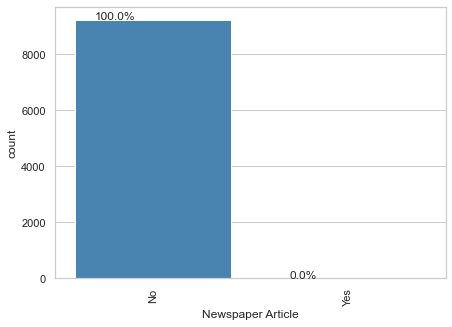

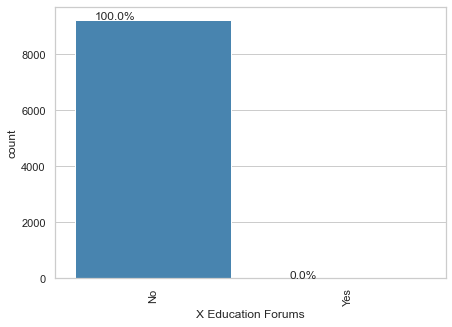

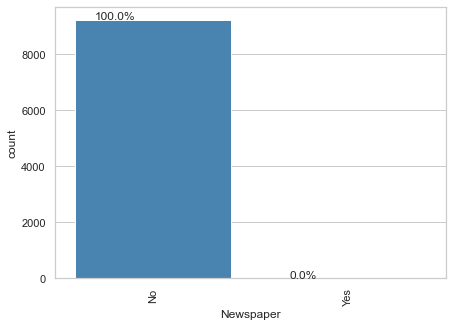

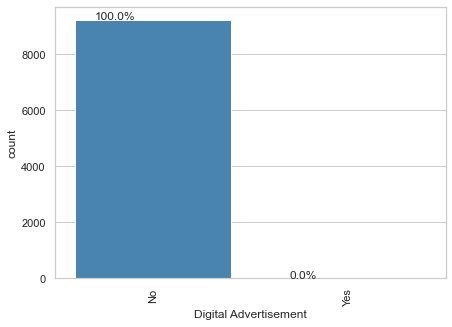

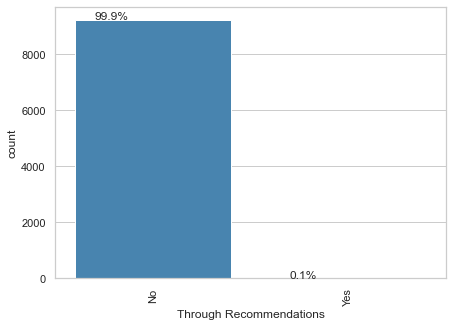

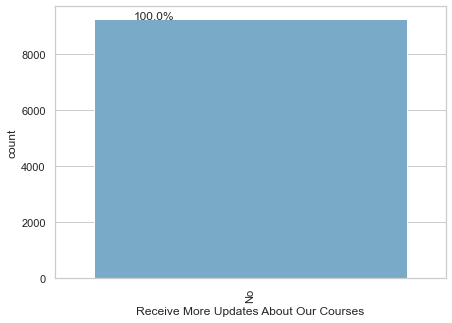

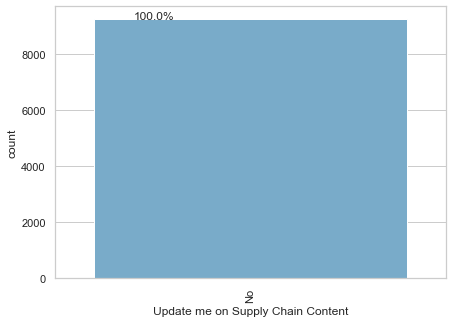

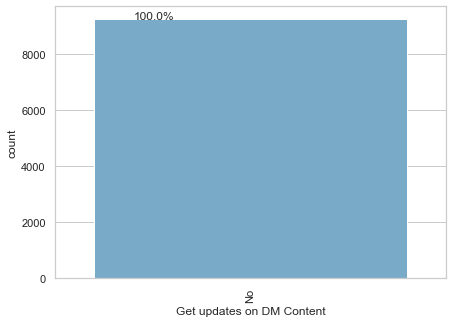

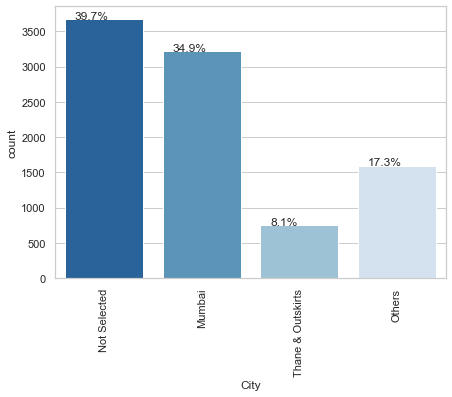

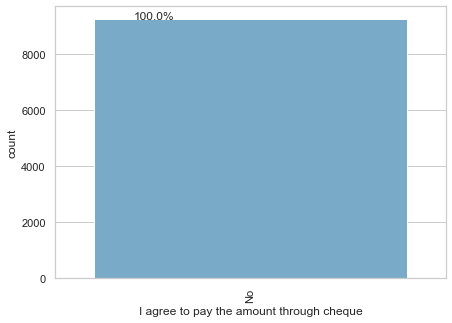

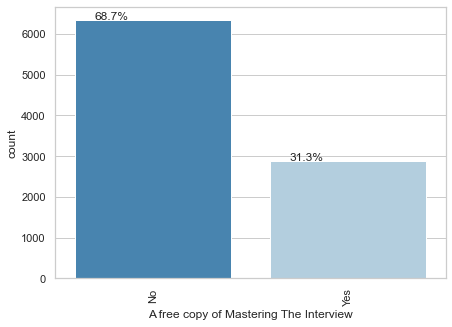

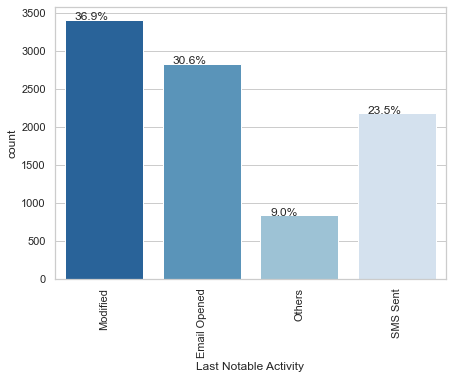

In [48]:
for item in category_features:
    univariate(Leads_df,item,1)

### Inferences
- Most of the lead's origin is Landing page Submission (52.9%)
- Most of the Lead source(31.1%) is from Google
- In the case of Do not email, about 92% of people have selected No.
- In case of Do not call 100% have selected NO.
- Email opened is the highest in the case of the Last activity.
- In the case of Last Notable Activity modified had 36.9% followed by 30.6% 
- 98.4% of the leads are from India.
- In the case of specialization, Not Specified has the highest count followed by Others followed by Finance Management.
- Most of the leads are unemployed, and about 29.1% did not select any option.
- Most of the leads are here for better career prospects.
- In the case of search, 99.8% selected No.
- 100% selected No in the case of Magazine, Newspaper article, X Education Forums, NewsPaper, Digital Advertisement, Receive More Updates About our Courses, Update me on Supply Chain Content, Get Updates on DM Content, and I agree to pay the amount through cheque.
- 0.1 % leads came through Recommendations
- Most of the Leads didn’t select the city. Mumbai had the highest count after that.
- 68.7% opted for A free copy of mastering The interview.


### Numerical Variables

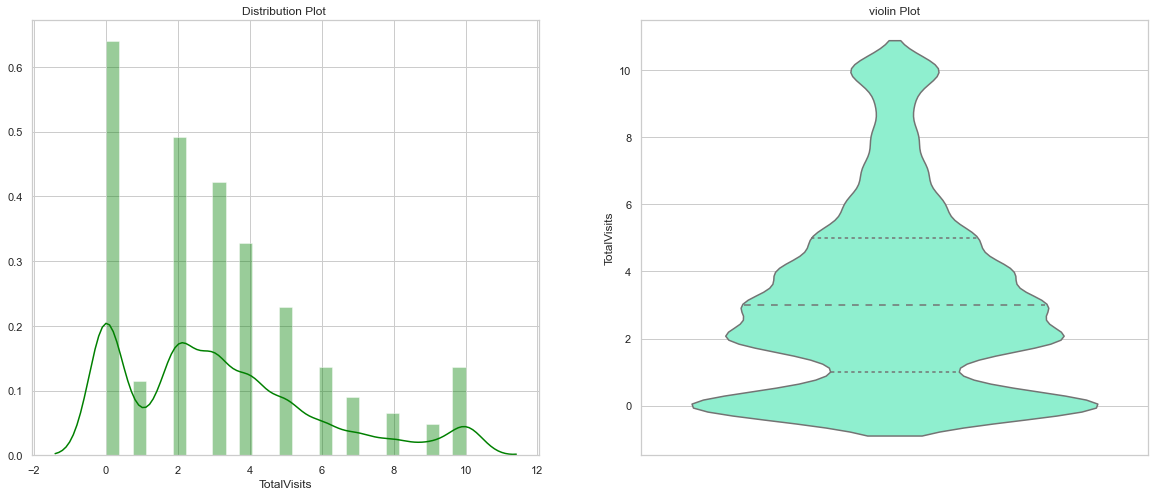

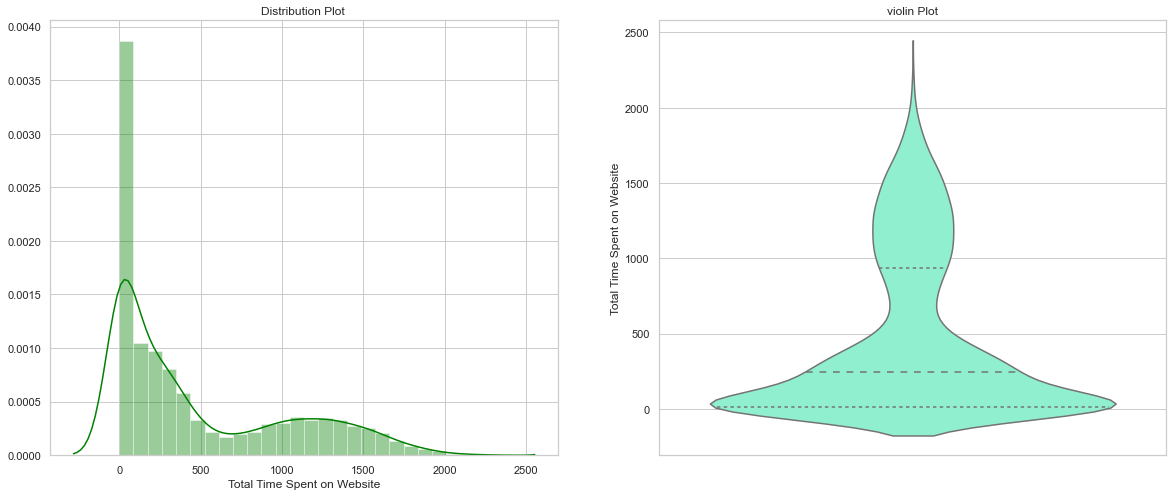

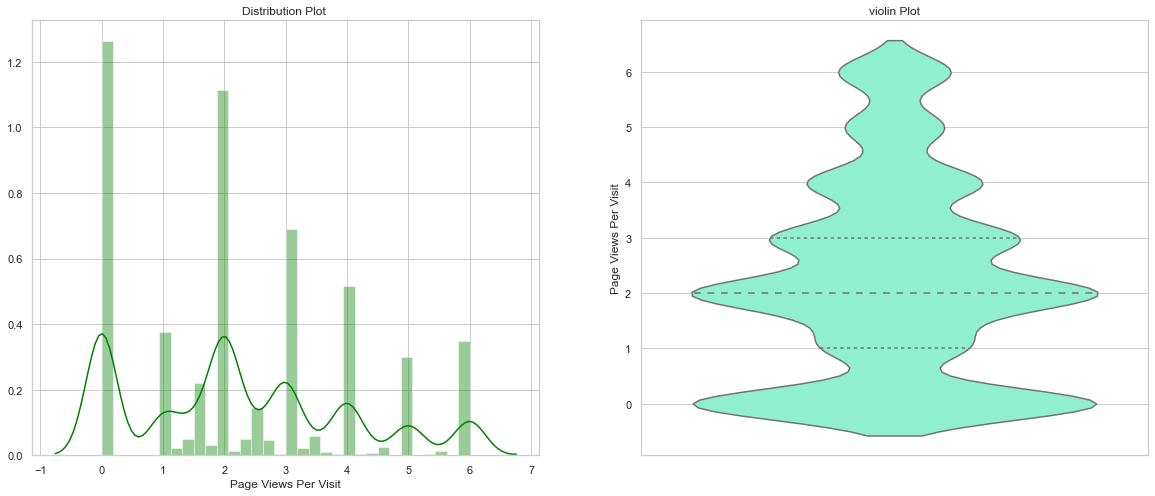

In [49]:
for item in number_features:
    univariate(df=Leads_df,col=item,vartype=0)

### Inferences 
- The variables are not normally distributed .

## 3.2 Bivariate Analysis

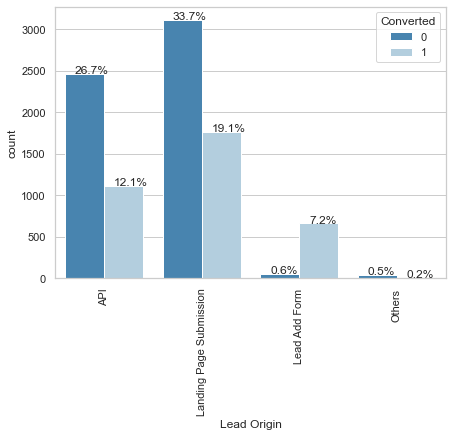

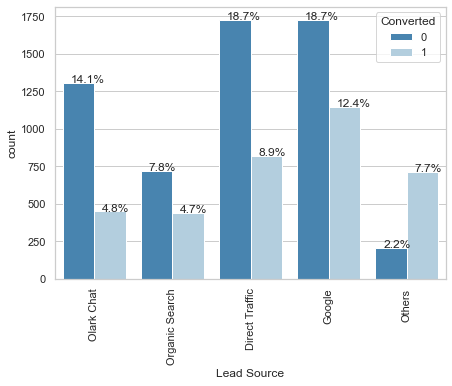

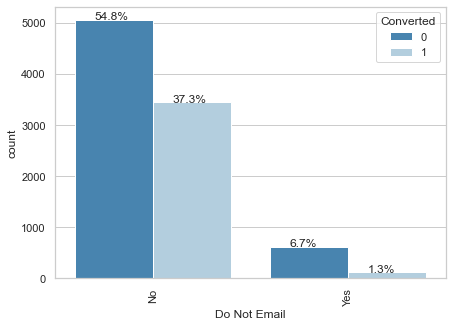

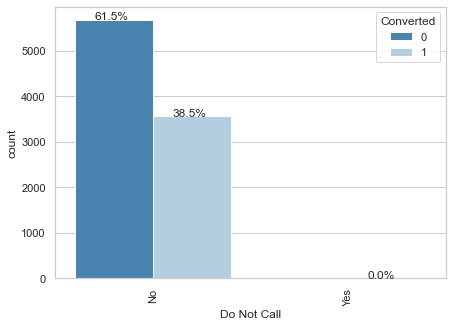

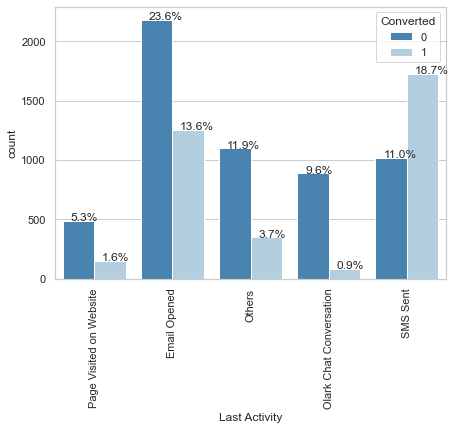

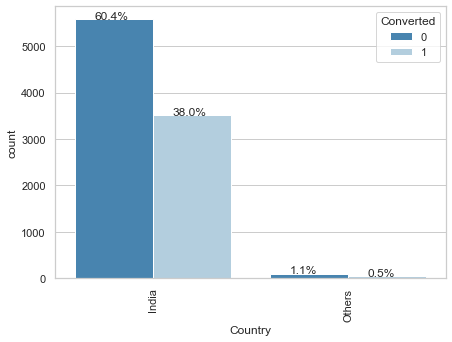

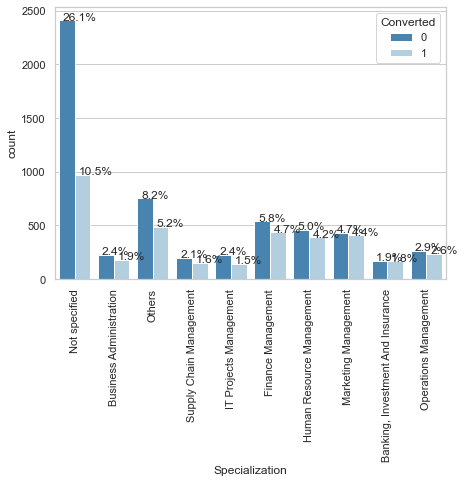

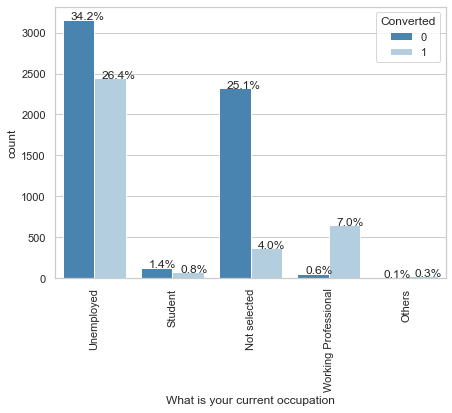

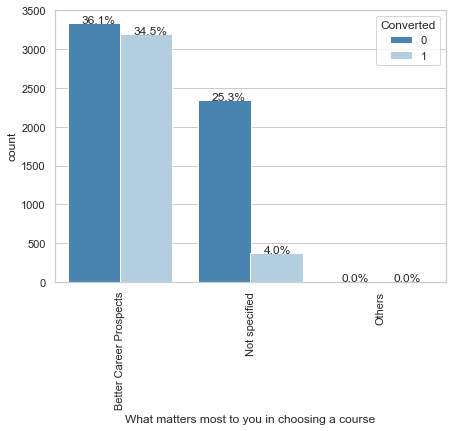

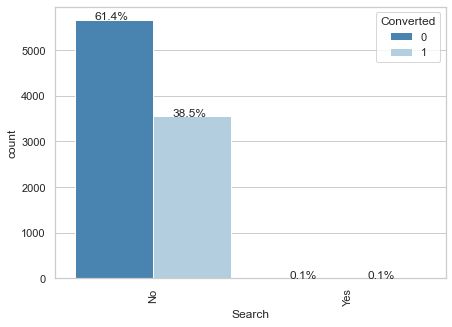

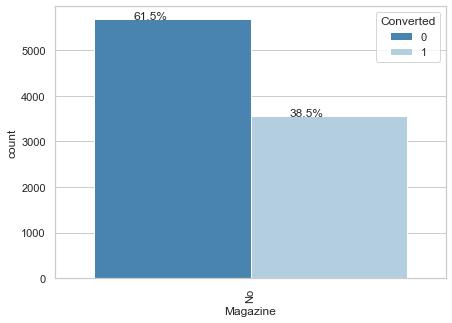

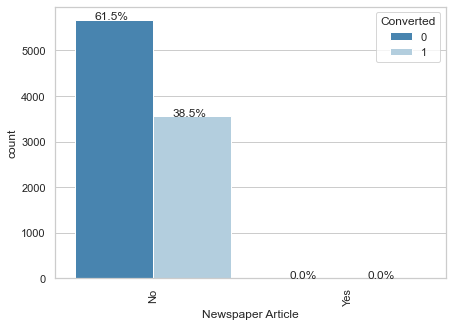

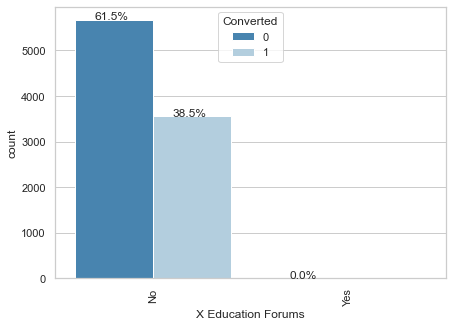

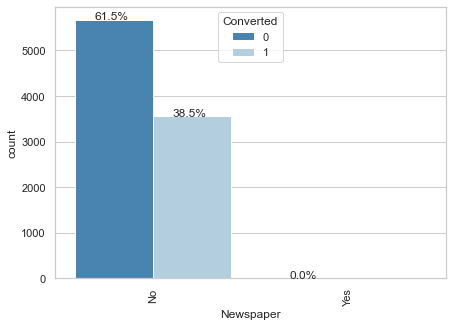

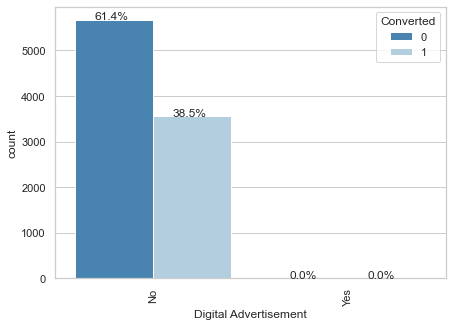

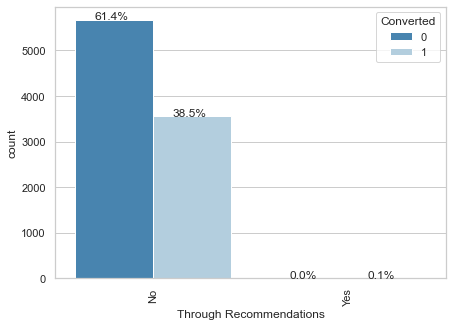

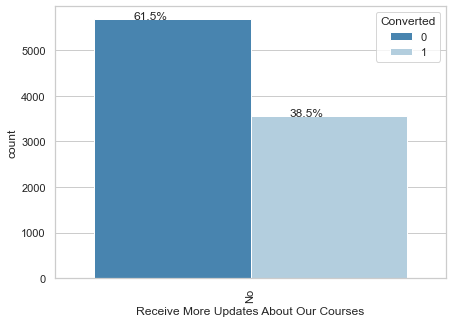

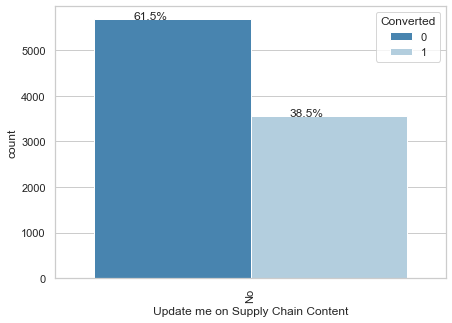

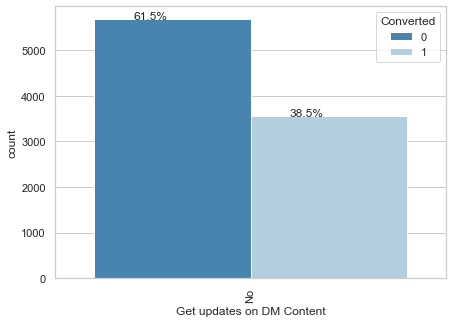

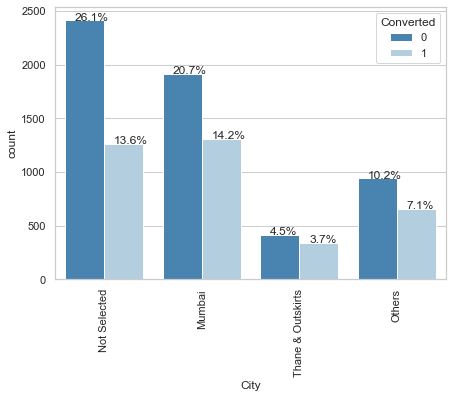

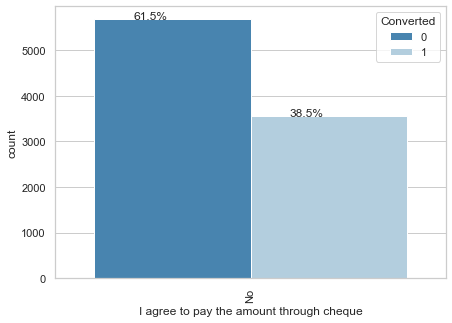

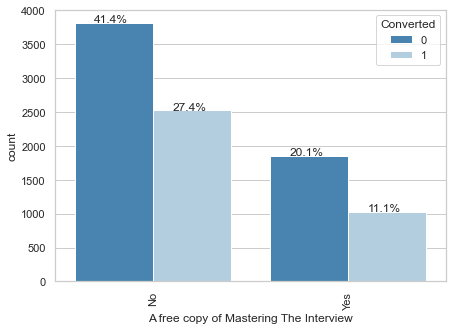

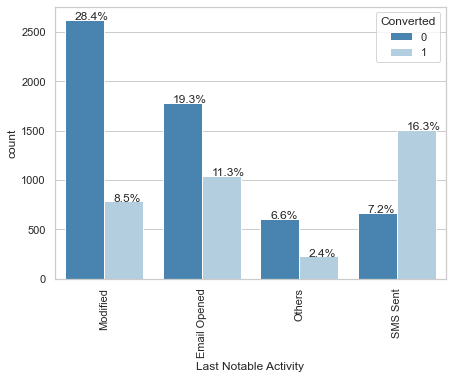

In [50]:
for item in category_features:
    univariate(Leads_df,item,1,hue=Leads_df['Converted'])

### Inferences 
- Landing page submission has the highest conversion rate as well as non conversion rate.
- Most of the converted leads has google as source.
- About 38% of leads who selected do not call or email got converted.
- SMS sent activity had the highest conversion rate.
- 26% of the leads which were converted were unemployed and 34 % of the leads were here for better career prospects.
- About 39% of leads who selected NO to magazine, Newspaper etc got converted.
- SMS sent was the last notable activity which got converted which is about 17%.


### Total Time Spent on Website
As per the Range of the time we can analyze the data in 2 parts 
1. Time spent less than 1 hr.
2. Time spent more than 1 hr.

#### More than 1 hr

Converted,0,1,Conversion(%)
hours spent,,,
22,57.0,139.0,71.0
19,53.0,138.0,72.0
17,45.0,135.0,75.0
18,64.0,130.0,67.0
20,60.0,128.0,68.0
21,62.0,128.0,67.0
16,55.0,127.0,70.0
25,33.0,117.0,78.0
23,55.0,109.0,66.0


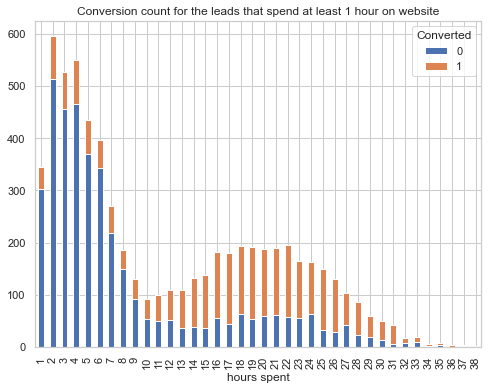

In [51]:
# dataframe is sliced for more than one hour time spent on website
leads1hrplus=Leads_df[Leads_df['Total Time Spent on Website']>=60]
leads1hrplus["hours spent"]=round(leads1hrplus["Total Time Spent on Website"]/60).astype(int)
time_spent_abv1hr=leads1hrplus.pivot_table(values='Lead Number',index=['hours spent'],columns='Converted', aggfunc='count').fillna(0)
time_spent_abv1hr["Conversion(%)"] =round(time_spent_abv1hr[1]/(time_spent_abv1hr[0]+time_spent_abv1hr[1]),2)*100
time_spent_abv1hr.sort_values(ascending=False,by=1).head(20)
time_spent_abv1hr.iloc[:,:-1].plot(kind='bar',title= "Conversion count for the leads that spend at least 1 hour on website",
                                   stacked=True,figsize=[8,6])

#### Less Than 1 hr.

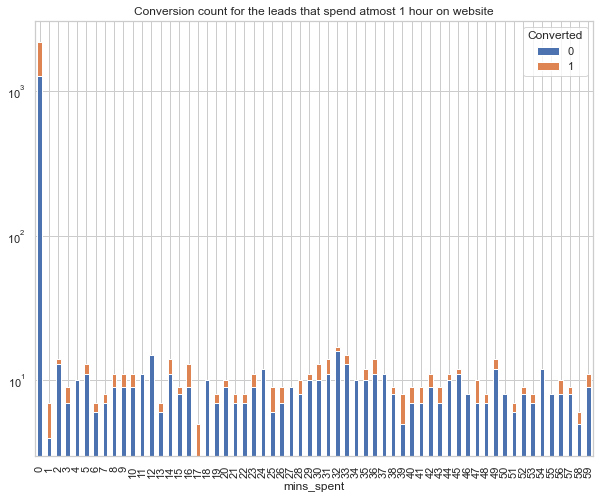

In [52]:
leadslessthan1hr=Leads_df[Leads_df['Total Time Spent on Website']<60]
leadslessthan1hr["mins_spent"]=leadslessthan1hr["Total Time Spent on Website"].astype(int)
time_spent_upto1hr=leadslessthan1hr.pivot_table(values='Lead Number',index=['mins_spent'],columns='Converted', aggfunc='count').fillna(0)
time_spent_upto1hr["Conversion(%)"] =round(time_spent_upto1hr[1]/(time_spent_upto1hr[0]+time_spent_upto1hr[1]),2)*100
time_spent_upto1hr.sort_values(ascending=False,by="Conversion(%)").head(20)
time_spent_upto1hr.iloc[:,:-1].plot(kind='bar',title="Conversion count for the leads that spend atmost 1 hour on website",
                                    stacked=True,figsize=[10,8],log=True);

#### Total Visits 

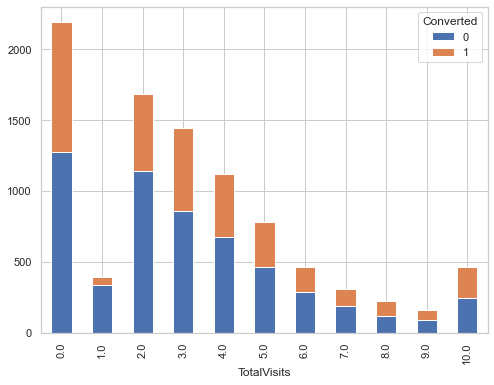

In [53]:
cols=['TotalVisits']
numdfcount=round(Leads_df.pivot_table(values='Lead Number',index=cols,columns='Converted', aggfunc='count')).fillna(0)
numdfcount["Conversion(%)"]=round((numdfcount[1]/(numdfcount[0]+numdfcount[1]))*100)
cnplot=numdfcount.iloc[:,:-1].plot(kind="bar",stacked=True, legend="upper right",figsize=[8,6])

#### Page Views Per Visit

Converted,0,1,Conversion(%)
Page Views Per Visit,,,
0.0,1273.0,916.0,42.0
1.0,544.0,232.0,30.0
2.0,1703.0,1017.0,37.0
3.0,811.0,518.0,39.0
4.0,638.0,434.0,40.0
5.0,314.0,212.0,40.0
6.0,396.0,232.0,37.0


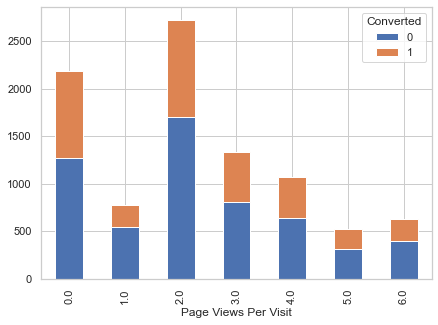

In [54]:
pageview=Leads_df.pivot_table(values='Lead Number',index=['Page Views Per Visit'],columns='Converted', aggfunc='count')
pageview.reset_index(inplace=True)
pageviews=pageview.round().groupby("Page Views Per Visit").sum()
pageviews["Conversion(%)"]=round((pageviews[1]/(pageviews[0]+pageviews[1]))*100)
pageviews.head(20)
pageviews.iloc[:,:-1].plot(kind="bar",legend="upper right",stacked=True,figsize=[7,5])

## Inferences
- 17 mins has the highest conversion rate (i.e. all) and  in case of leads above 1 hr those who spent 22 hrs have a better conversion rate.
- Those who have visited the page 2 times have a better conversion rate.
- 0 - 1 times total visits have a better conversion rate .

## 3.3 Plot for Multicolinearity check 

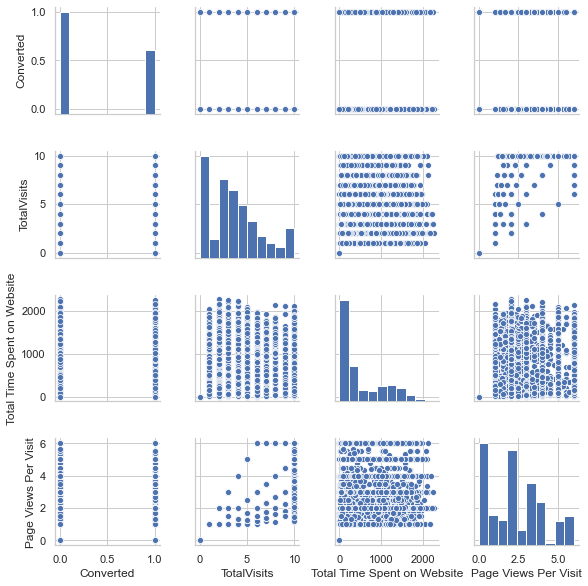

In [55]:
sns.pairplot(Leads_df[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']],size=2)# re

plt.show()

#### Inferences
- There seems to be so kind of relation between Page Views per visit and Total Visits .
- Plotting a heat map to visualise the same 

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.045568,0.362483,-0.005289
TotalVisits,0.045568,1.000000,0.357773,0.767585
Total Time Spent on Website,0.362483,0.357773,1.000000,0.360425
Page Views Per Visit,-0.005289,0.767585,0.360425,1.000000


<Figure size 864x432 with 0 Axes>

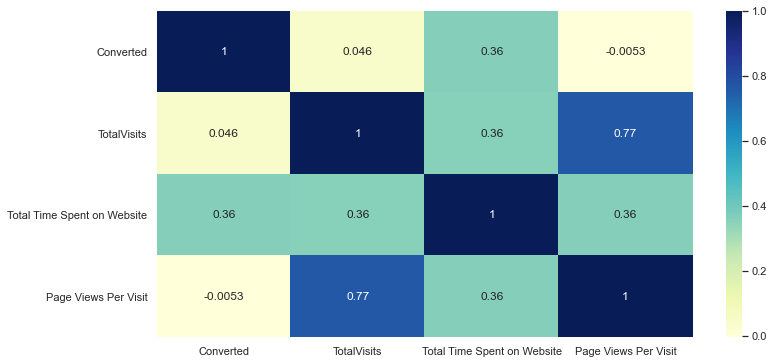

In [56]:
corr = Leads_df[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr()
corr.head()
# Plot the coorelation
# Let's check the correlation between the numerical/continuous variables

plt.figure(figsize = (12, 6))
sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.show()

### Inferencess 
- There exists a coorelation between Page views per visit and Total Visit. 
- We can take one of the variables for our analysis.
- Coorelation coeeficient between 0.75 to -0.75 is considered as safe. Hence we will be dropping TotalVisits.

As per our univariate and bivariate analysis we found there are a lot of skewed columns which we can be dropped and we can proceed with the data preparation and model building.


In [57]:
#Dropping the columns.
leads_df = Leads_df.drop(['Do Not Call', 'Search', 'Magazine','Newspaper Article', 'X Education Forums', 
                          'Newspaper','Digital Advertisement', 'Through Recommendations',
                          'Receive More Updates About Our Courses', 'Receive More Updates About Our Courses', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque', 
                          'Update me on Supply Chain Content', 'Country', 'City','Last Notable Activity','TotalVisits'], axis = 1) 

## 4. Data Preparation

In [58]:
## Inspect the dataframe 
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,0,0,0.0,Page Visited on Website,Not specified,Unemployed,Better Career Prospects,No
1,660728,API,Organic Search,No,0,674,2.5,Email Opened,Not specified,Unemployed,Better Career Prospects,No
2,660727,Landing Page Submission,Direct Traffic,No,1,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,305,1.0,Others,Others,Unemployed,Better Career Prospects,No
4,660681,Landing Page Submission,Google,No,1,1428,1.0,Others,Not specified,Unemployed,Better Career Prospects,No


There are few Variables with Yes and No type , we would need to convert them to 1,0 i.e. 1= yes ,0= no 

In [59]:
# List of variables to map
varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

In [60]:
## Inspect the dataframe 
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Not specified,Unemployed,Better Career Prospects,0
1,660728,API,Organic Search,0,0,674,2.5,Email Opened,Not specified,Unemployed,Better Career Prospects,0
2,660727,Landing Page Submission,Direct Traffic,0,1,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,1
3,660719,Landing Page Submission,Direct Traffic,0,0,305,1.0,Others,Others,Unemployed,Better Career Prospects,0
4,660681,Landing Page Submission,Google,0,1,1428,1.0,Others,Not specified,Unemployed,Better Career Prospects,0


## 4.1 Create Dummy Values 

In [61]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummyVar = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                    'What is your current occupation',
                                    'What matters most to you in choosing a course']], drop_first=True)

dummyVar.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Not specified,What matters most to you in choosing a course_Others
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [62]:
# Concatinate the same with the leads_df
leads_df = pd.concat([leads_df, dummyVar], axis=1)
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Not specified,What matters most to you in choosing a course_Others
0,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Not specified,Unemployed,Better Career Prospects,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,660728,API,Organic Search,0,0,674,2.5,Email Opened,Not specified,Unemployed,Better Career Prospects,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,305,1.0,Others,Others,Unemployed,Better Career Prospects,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,660681,Landing Page Submission,Google,0,1,1428,1.0,Others,Not specified,Unemployed,Better Career Prospects,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [63]:
# Drop the columns which were dummyfied 
leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                          'What is your current occupation',
                          'What matters most to you in choosing a course'], axis = 1)
leads_df.head()

,Lead Number,Do Not Email,Converted,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Not specified,What matters most to you in choosing a course_Others
0,660737,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,660728,0,0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,660727,0,1,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,660719,0,0,305,1.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,660681,0,1,1428,1.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [64]:
leads_df.shape
#Inspect the types of Variables.
leads_df.dtypes

(9240, 32)

Lead Number                                                      int64
Do Not Email                                                     int64
Converted                                                        int64
Total Time Spent on Website                                      int64
Page Views Per Visit                                           float64
A free copy of Mastering The Interview                           int64
Lead Origin_Landing Page Submission                              uint8
Lead Origin_Lead Add Form                                        uint8
Lead Origin_Others                                               uint8
Lead Source_Google                                               uint8
Lead Source_Olark Chat                                           uint8
Lead Source_Organic Search                                       uint8
Lead Source_Others                                               uint8
Last Activity_Olark Chat Conversation                            uint8
Last A

## 4.2 Splitting the Data into Training and Testing set 

In [65]:
# import the required libraries.
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [66]:
# Assigning the X and y
X = leads_df.drop(['Converted'], axis=1)
lead_info_X = X.pop('Lead Number')
X.head()
lead_info_X.head()
y = leads_df['Converted']
y.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Not specified,What matters most to you in choosing a course_Others
0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,305,1.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,1428,1.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


0    660737
1    660728
2    660727
3    660719
4    660681
Name: Lead Number, dtype: int64

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

## 4.3 Scaling the Features
We will use the StandardScalar

In [68]:
number_features

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [69]:
#1. instantiate ab object.
scaler = StandardScaler()

#2. Fit on data
X_train[number_features[1:]] = scaler.fit_transform(X_train[number_features[1:]])

X_train.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Not specified,What matters most to you in choosing a course_Others
1871,0,-0.885371,-1.266675,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6795,0,0.005716,-0.516439,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3516,0,-0.691418,0.143543,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
8105,0,1.365219,1.553761,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3934,0,-0.885371,-1.266675,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [70]:
lead_per = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
lead_per

38.53896103896104

### Inferences 
- We have almost 39% current lead convert rate

## 5. Building Model

In [71]:
# import the required libraries.
import statsmodels.api as sm
y_train
X= sm.add_constant(X_train)
X

1871    0
6795    0
3516    0
8105    0
3934    0
       ..
350     1
79      1
8039    1
6936    0
5640    0
Name: Converted, Length: 6468, dtype: int64

,const,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Not specified,What matters most to you in choosing a course_Others
1871,1.0,0,-0.885371,-1.266675,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6795,1.0,0,0.005716,-0.516439,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3516,1.0,0,-0.691418,0.143543,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
8105,1.0,0,1.365219,1.553761,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3934,1.0,0,-0.885371,-1.266675,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1.0,0,-0.885371,-1.266675,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
79,1.0,0,0.404601,-0.138501,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8039,1.0,0,-0.885371,-1.266675,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6936,1.0,0,-0.449891,-0.138501,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


## 5.1 Using States model for Modeling

In [72]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.6
Date:                Mon, 07 Sep 2020   Deviance:                       5235.2
Time:                        00:26:29   Pearson chi2:                 7.00e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          19.0241   1.18e+04      0.002      0.999   -2.31e+04    2.31e+04
Do Not Email                                                   -1.0395      0.173     -6.009      0.000      -1.379      -0.700
Total Time Spent on Website                                     1.0618      0.040     26.610      0.000       0.984       1.140
Page Views Per Visit                                           -0.1320      0.052     -2.536      0.011      -0.234      -0.030
A free copy of Mastering The Interview                         -0.1666      0.107     -1.550      0.121      -0.377       0.044
Lead Origin_Landing Page Submission                            -0.7781      0.138     -5.648      0.000      -1.048      -0.508
Lead Origin_Lead Add Form                                       2.8748      0.337      8.540      0.000       2.215       3.535
Lead Origin_Others                                             -0.6609      0.565     -1.170      0.242      -1.768       0.446
Lead Source_Google                                              0.2785      0.114      2.439      0.015       0.055       0.502
Lead Source_Olark Chat                                          1.1804      0.164      7.205      0.000       0.859       1.501
Lead Source_Organic Search                                      0.2587      0.129      2.002      0.045       0.005       0.512
Lead Source_Others                                              0.4310      0.296      1.456      0.145      -0.149       1.011
Last Activity_Olark Chat Conversation                          -1.3895      0.173     -8.034      0.000      -1.728      -1.050
Last Activity_Others                                           -0.7398      0.124     -5.978      0.000      -0.982      -0.497
Last Activity_Page Visited on Website                          -0.4859      0.151     -3.226      0.001      -0.781      -0.191
Last Activity_SMS Sent                                          1.1248      0.080     13.987      0.000       0.967       1.282
Specialization_Business Administration                         -0.3610      0.245     -1.472      0.141      -0.842       0.120
Specialization_Finance Management                              -0.0148      0.210     -0.071      0.944      -0.426       0.397
Specialization_Human Resource Management                       -0.2268      0.213     -1.064      0.287      -0.644       0.191
Specialization_IT Projects Management                           0.0304      0.255      0.119      0.905      -0.469       0.529
Specialization_Marketing Management                            -0.2677      0.213     -1.254      0.210      -0.686       0.151
Specializat

### Inferences 
- There are few Variables which have high P value which we will need to eleminate .
- Lets use RFE to select top 20 Features and proceed further 

## 5.2  Using Recurssive feature elemination 

In [73]:
# Import the library
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [74]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [75]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Others', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_Finance Management', False, 11),
 ('Specialization_Human Resource Management', False, 6),
 ('Specialization_IT Projects Management', False, 10),
 ('Specialization_Marketing Management', False, 2),
 ('Specialization_Not specified', True, 1),
 ('Specialization_Operations Management', False, 3),
 ('Specializatio

In [76]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Not specified',
       'What is your current occupation_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Not specified',
       'What matters most to you in choosing a course_Others'],
      dtype='object')

## 5.3 Accessing the model again using Stats model

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.3
Date:                Mon, 07 Sep 2020   Deviance:                       5252.5
Time:                        00:26:30   Pearson chi2:                 7.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          19.2113   1.18e+04      0.002      0.999    -2.3e+04    2.31e+04
Do Not Email                                                   -1.0631      0.172     -6.163      0.000      -1.401      -0.725
Total Time Spent on Website                                     1.0538      0.040     26.571      0.000       0.976       1.132
A free copy of Mastering The Interview                         -0.2921      0.088     -3.314      0.001      -0.465      -0.119
Lead Origin_Landing Page Submission                            -0.8655      0.133     -6.503      0.000      -1.126      -0.605
Lead Origin_Lead Add Form                                       3.0416      0.328      9.281      0.000       2.399       3.684
Lead Origin_Others                                             -0.5326      0.563     -0.945      0.345      -1.637       0.572
Lead Source_Olark Chat                                          1.0874      0.124      8.744      0.000       0.844       1.331
Lead Source_Others                                              0.1524      0.281      0.542      0.588      -0.398       0.703
Last Activity_Olark Chat Conversation                          -1.3781      0.173     -7.973      0.000      -1.717      -1.039
Last Activity_Others                                           -0.7045      0.123     -5.715      0.000      -0.946      -0.463
Last Activity_Page Visited on Website                          -0.4907      0.150     -3.266      0.001      -0.785      -0.196
Last Activity_SMS Sent                                          1.1198      0.080     13.994      0.000       0.963       1.277
Specialization_Business Administration                         -0.1766      0.170     -1.041      0.298      -0.509       0.156
Specialization_Not specified                                   -0.9462      0.126     -7.521      0.000      -1.193      -0.700
What is your current occupation_Others                        -18.3188   1.18e+04     -0.002      0.999   -2.31e+04     2.3e+04
What is your current occupation_Student                       -19.1620   1.18e+04     -0.002      0.999   -2.31e+04     2.3e+04
What is your current occupation_Unemployed                    -19.2649   1.18e+04     -0.002      0.999   -2.31e+04     2.3e+04
What is your current occupation_Working Professional          -16.8343   1.18e+04     -0.001      0.999   -2.31e+04     2.3e+04
What matters most to you in choosing a course_Not specified   -20.3600   1.18e+04     -0.002      0.999   -2.31e+04     2.3e+04
What matters most to you in choosing a course_Others           -2.3757      2.250     -1.056      0.291      -6.786       2.035
===========

In [78]:
# Dropping - What is your current occupation_Others As it had P value near to 1 i.e. 0.999 which is bad for the model
col = col.drop(['What is your current occupation_Others'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Not specified',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Not specified',
       'What matters most to you in choosing a course_Others'],
      dtype='object')

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.5
Date:                Mon, 07 Sep 2020   Deviance:                       5253.0
Time:                        00:26:30   Pearson chi2:                 7.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                           0.9467      0.534      1.774      0.076      -0.099       1.992
Do Not Email                                                   -1.0648      0.172     -6.176      0.000      -1.403      -0.727
Total Time Spent on Website                                     1.0539      0.040     26.572      0.000       0.976       1.132
A free copy of Mastering The Interview                         -0.2916      0.088     -3.307      0.001      -0.464      -0.119
Lead Origin_Landing Page Submission                            -0.8681      0.133     -6.526      0.000      -1.129      -0.607
Lead Origin_Lead Add Form                                       3.0411      0.328      9.280      0.000       2.399       3.683
Lead Origin_Others                                             -0.5328      0.563     -0.946      0.344      -1.637       0.571
Lead Source_Olark Chat                                          1.0881      0.124      8.748      0.000       0.844       1.332
Lead Source_Others                                              0.1527      0.281      0.543      0.587      -0.398       0.703
Last Activity_Olark Chat Conversation                          -1.3786      0.173     -7.973      0.000      -1.717      -1.040
Last Activity_Others                                           -0.7058      0.123     -5.727      0.000      -0.947      -0.464
Last Activity_Page Visited on Website                          -0.4921      0.150     -3.275      0.001      -0.787      -0.198
Last Activity_SMS Sent                                          1.1201      0.080     13.997      0.000       0.963       1.277
Specialization_Business Administration                         -0.1776      0.170     -1.047      0.295      -0.510       0.155
Specialization_Not specified                                   -0.9489      0.126     -7.547      0.000      -1.195      -0.702
What is your current occupation_Student                        -0.9002      0.572     -1.574      0.115      -2.021       0.221
What is your current occupation_Unemployed                     -0.9980      0.525     -1.901      0.057      -2.027       0.031
What is your current occupation_Working Professional            1.4296      0.554      2.583      0.010       0.345       2.515
What matters most to you in choosing a course_Not specified    -2.0943      0.529     -3.957      0.000      -3.131      -1.057
What matters most to you in choosing a course_Others           -2.3758      2.248     -1.057      0.291      -6.783       2.031
===============================================================================================================================
"""

In [80]:
# Dropping Lead Source_Others as it had P value - 0.587
col = col.drop(['Lead Source_Others'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Not specified',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Not specified',
       'What matters most to you in choosing a course_Others'],
      dtype='object')

In [81]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.6
Date:                Mon, 07 Sep 2020   Deviance:                       5253.3
Time:                        00:26:30   Pearson chi2:                 7.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                           0.9507      0.533      1.782      0.075      -0.095       1.996
Do Not Email                                                   -1.0652      0.172     -6.178      0.000      -1.403      -0.727
Total Time Spent on Website                                     1.0535      0.040     26.571      0.000       0.976       1.131
A free copy of Mastering The Interview                         -0.2917      0.088     -3.309      0.001      -0.465      -0.119
Lead Origin_Landing Page Submission                            -0.8739      0.133     -6.589      0.000      -1.134      -0.614
Lead Origin_Lead Add Form                                       3.1847      0.195     16.365      0.000       2.803       3.566
Lead Origin_Others                                             -0.3886      0.497     -0.782      0.434      -1.363       0.586
Lead Source_Olark Chat                                          1.0788      0.123      8.761      0.000       0.838       1.320
Last Activity_Olark Chat Conversation                          -1.3759      0.173     -7.965      0.000      -1.714      -1.037
Last Activity_Others                                           -0.7042      0.123     -5.716      0.000      -0.946      -0.463
Last Activity_Page Visited on Website                          -0.4910      0.150     -3.268      0.001      -0.785      -0.196
Last Activity_SMS Sent                                          1.1184      0.080     13.987      0.000       0.962       1.275
Specialization_Business Administration                         -0.1773      0.170     -1.045      0.296      -0.510       0.155
Specialization_Not specified                                   -0.9475      0.126     -7.536      0.000      -1.194      -0.701
What is your current occupation_Student                        -0.8968      0.572     -1.569      0.117      -2.017       0.224
What is your current occupation_Unemployed                     -0.9945      0.525     -1.895      0.058      -2.023       0.034
What is your current occupation_Working Professional            1.4335      0.553      2.590      0.010       0.349       2.518
What matters most to you in choosing a course_Not specified    -2.0904      0.529     -3.951      0.000      -3.127      -1.053
What matters most to you in choosing a course_Others           -2.3758      2.249     -1.056      0.291      -6.784       2.032
===============================================================================================================================
"""

## Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [82]:
# import the required libraries.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creating a function for getting VIF.
def f_vif(v_df):
    vif = pd.DataFrame()
    vif['Features'] = v_df.columns
    vif['VIF'] = [variance_inflation_factor(v_df.values, i) for i in range(v_df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return(vif)

In [83]:
f_vif(X_train_sm)

,Features,VIF
0,const,201.80
15,What is your current occupation_Unemployed,47.86
17,What matters most to you in choosing a course_...,41.86
16,What is your current occupation_Working Profes...,14.89
14,What is your current occupation_Student,4.56
4,Lead Origin_Landing Page Submission,3.71
13,Specialization_Not specified,3.05
7,Lead Source_Olark Chat,1.91
5,Lead Origin_Lead Add Form,1.54
3,A free copy of Mastering The Interview,1.52


In [84]:
# Dropping-  What is your current occupation_Unemployed-  as it has very high vif 
col = col.drop(['What is your current occupation_Unemployed'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Not specified',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Not specified',
       'What matters most to you in choosing a course_Others'],
      dtype='object')

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.5
Date:                Mon, 07 Sep 2020   Deviance:                       5257.0
Time:                        00:26:30   Pearson chi2:                 7.12e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -0.0264      0.131     -0.201      0.841      -0.283       0.230
Do Not Email                                                   -1.0666      0.172     -6.195      0.000      -1.404      -0.729
Total Time Spent on Website                                     1.0551      0.040     26.614      0.000       0.977       1.133
A free copy of Mastering The Interview                         -0.2909      0.088     -3.302      0.001      -0.464      -0.118
Lead Origin_Landing Page Submission                            -0.8859      0.132     -6.691      0.000      -1.145      -0.626
Lead Origin_Lead Add Form                                       3.1885      0.195     16.388      0.000       2.807       3.570
Lead Origin_Others                                             -0.3956      0.498     -0.795      0.427      -1.371       0.580
Lead Source_Olark Chat                                          1.0770      0.123      8.745      0.000       0.836       1.318
Last Activity_Olark Chat Conversation                          -1.3667      0.172     -7.932      0.000      -1.704      -1.029
Last Activity_Others                                           -0.7052      0.123     -5.732      0.000      -0.946      -0.464
Last Activity_Page Visited on Website                          -0.4824      0.150     -3.216      0.001      -0.776      -0.188
Last Activity_SMS Sent                                          1.1135      0.080     13.932      0.000       0.957       1.270
Specialization_Business Administration                         -0.1620      0.169     -0.956      0.339      -0.494       0.170
Specialization_Not specified                                   -0.9604      0.125     -7.654      0.000      -1.206      -0.714
What is your current occupation_Student                         0.0831      0.239      0.348      0.728      -0.386       0.552
What is your current occupation_Working Professional            2.4152      0.191     12.652      0.000       2.041       2.789
What matters most to you in choosing a course_Not specified    -1.1026      0.088    -12.591      0.000      -1.274      -0.931
What matters most to you in choosing a course_Others           -2.3855      2.246     -1.062      0.288      -6.788       2.017
===============================================================================================================================
"""

In [86]:
# Check VIF
f_vif(X_train_sm)

,Features,VIF
0,const,14.79
4,Lead Origin_Landing Page Submission,3.67
13,Specialization_Not specified,3.02
7,Lead Source_Olark Chat,1.91
5,Lead Origin_Lead Add Form,1.54
3,A free copy of Mastering The Interview,1.52
8,Last Activity_Olark Chat Conversation,1.40
9,Last Activity_Others,1.37
11,Last Activity_SMS Sent,1.33
2,Total Time Spent on Website,1.27


All VIF's are below 5 now but for - What is your current occupation_Student the P value is very High 
hence dropping that 

In [87]:
col = col.drop(['What is your current occupation_Student'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Not specified',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Not specified',
       'What matters most to you in choosing a course_Others'],
      dtype='object')

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.6
Date:                Mon, 07 Sep 2020   Deviance:                       5257.1
Time:                        00:26:30   Pearson chi2:                 7.12e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -0.0241      0.131     -0.184      0.854      -0.281       0.232
Do Not Email                                                   -1.0665      0.172     -6.193      0.000      -1.404      -0.729
Total Time Spent on Website                                     1.0551      0.040     26.614      0.000       0.977       1.133
A free copy of Mastering The Interview                         -0.2911      0.088     -3.304      0.001      -0.464      -0.118
Lead Origin_Landing Page Submission                            -0.8850      0.132     -6.685      0.000      -1.144      -0.626
Lead Origin_Lead Add Form                                       3.1891      0.195     16.394      0.000       2.808       3.570
Lead Origin_Others                                             -0.3965      0.498     -0.797      0.425      -1.372       0.579
Lead Source_Olark Chat                                          1.0787      0.123      8.766      0.000       0.838       1.320
Last Activity_Olark Chat Conversation                          -1.3663      0.172     -7.929      0.000      -1.704      -1.029
Last Activity_Others                                           -0.7067      0.123     -5.748      0.000      -0.948      -0.466
Last Activity_Page Visited on Website                          -0.4825      0.150     -3.217      0.001      -0.776      -0.189
Last Activity_SMS Sent                                          1.1119      0.080     13.936      0.000       0.956       1.268
Specialization_Business Administration                         -0.1630      0.169     -0.963      0.336      -0.495       0.169
Specialization_Not specified                                   -0.9600      0.125     -7.651      0.000      -1.206      -0.714
What is your current occupation_Working Professional            2.4130      0.191     12.648      0.000       2.039       2.787
What matters most to you in choosing a course_Not specified    -1.1051      0.087    -12.661      0.000      -1.276      -0.934
What matters most to you in choosing a course_Others           -2.3869      2.244     -1.063      0.288      -6.786       2.012
===============================================================================================================================
"""

In [89]:
# Check VIF
f_vif(X_train_sm)

,Features,VIF
0,const,14.77
4,Lead Origin_Landing Page Submission,3.67
13,Specialization_Not specified,3.02
7,Lead Source_Olark Chat,1.91
5,Lead Origin_Lead Add Form,1.54
3,A free copy of Mastering The Interview,1.52
8,Last Activity_Olark Chat Conversation,1.40
9,Last Activity_Others,1.37
11,Last Activity_SMS Sent,1.32
2,Total Time Spent on Website,1.27


In [90]:
## Dropping Lead Origin_Others for higher P value 
col = col.drop(['Lead Origin_Others'], 1)
col


Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Specialization_Business Administration',
       'Specialization_Not specified',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Not specified',
       'What matters most to you in choosing a course_Others'],
      dtype='object')

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.9
Date:                Mon, 07 Sep 2020   Deviance:                       5257.8
Time:                        00:26:30   Pearson chi2:                 7.12e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -0.0379      0.130     -0.292      0.770      -0.292       0.216
Do Not Email                                                   -1.0655      0.172     -6.182      0.000      -1.403      -0.728
Total Time Spent on Website                                     1.0565      0.040     26.666      0.000       0.979       1.134
A free copy of Mastering The Interview                         -0.2901      0.088     -3.292      0.001      -0.463      -0.117
Lead Origin_Landing Page Submission                            -0.8721      0.131     -6.639      0.000      -1.130      -0.615
Lead Origin_Lead Add Form                                       3.2023      0.194     16.515      0.000       2.822       3.582
Lead Source_Olark Chat                                          1.0899      0.122      8.909      0.000       0.850       1.330
Last Activity_Olark Chat Conversation                          -1.3638      0.172     -7.917      0.000      -1.701      -1.026
Last Activity_Others                                           -0.7116      0.123     -5.793      0.000      -0.952      -0.471
Last Activity_Page Visited on Website                          -0.4808      0.150     -3.206      0.001      -0.775      -0.187
Last Activity_SMS Sent                                          1.1117      0.080     13.937      0.000       0.955       1.268
Specialization_Business Administration                         -0.1640      0.169     -0.968      0.333      -0.496       0.168
Specialization_Not specified                                   -0.9559      0.125     -7.631      0.000      -1.201      -0.710
What is your current occupation_Working Professional            2.4129      0.191     12.650      0.000       2.039       2.787
What matters most to you in choosing a course_Not specified    -1.1048      0.087    -12.656      0.000      -1.276      -0.934
What matters most to you in choosing a course_Others           -2.3818      2.244     -1.062      0.288      -6.779       2.015
===============================================================================================================================
"""

In [92]:
## Dropping Specialization_Business Administration for high p value 
col = col.drop(['Specialization_Business Administration'], 1)
col
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Specialization_Not specified',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Not specified',
       'What matters most to you in choosing a course_Others'],
      dtype='object')

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.4
Date:                Mon, 07 Sep 2020   Deviance:                       5258.8
Time:                        00:26:31   Pearson chi2:                 7.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -0.0502      0.129     -0.389      0.697      -0.303       0.203
Do Not Email                                                   -1.0672      0.172     -6.191      0.000      -1.405      -0.729
Total Time Spent on Website                                     1.0565      0.040     26.666      0.000       0.979       1.134
A free copy of Mastering The Interview                         -0.2888      0.088     -3.278      0.001      -0.461      -0.116
Lead Origin_Landing Page Submission                            -0.8715      0.131     -6.635      0.000      -1.129      -0.614
Lead Origin_Lead Add Form                                       3.2029      0.194     16.518      0.000       2.823       3.583
Lead Source_Olark Chat                                          1.0885      0.122      8.899      0.000       0.849       1.328
Last Activity_Olark Chat Conversation                          -1.3623      0.172     -7.910      0.000      -1.700      -1.025
Last Activity_Others                                           -0.7094      0.123     -5.775      0.000      -0.950      -0.469
Last Activity_Page Visited on Website                          -0.4842      0.150     -3.229      0.001      -0.778      -0.190
Last Activity_SMS Sent                                          1.1112      0.080     13.933      0.000       0.955       1.267
Specialization_Not specified                                   -0.9433      0.125     -7.573      0.000      -1.187      -0.699
What is your current occupation_Working Professional            2.4138      0.191     12.650      0.000       2.040       2.788
What matters most to you in choosing a course_Not specified    -1.1036      0.087    -12.649      0.000      -1.275      -0.933
What matters most to you in choosing a course_Others           -2.3709      2.245     -1.056      0.291      -6.772       2.030
===============================================================================================================================
"""

In [93]:
## Dropping What matters most to you in choosing a course_Others for high p value 
col = col.drop(['What matters most to you in choosing a course_Others'], 1)
col
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Specialization_Not specified',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Not specified'],
      dtype='object')

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.1
Date:                Mon, 07 Sep 2020   Deviance:                       5260.1
Time:                        00:26:31   Pearson chi2:                 7.17e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -0.0554      0.129     -0.430      0.667      -0.308       0.197
Do Not Email                                                   -1.0659      0.172     -6.184      0.000      -1.404      -0.728
Total Time Spent on Website                                     1.0567      0.040     26.674      0.000       0.979       1.134
A free copy of Mastering The Interview                         -0.2874      0.088     -3.263      0.001      -0.460      -0.115
Lead Origin_Landing Page Submission                            -0.8678      0.131     -6.613      0.000      -1.125      -0.611
Lead Origin_Lead Add Form                                       3.2013      0.194     16.516      0.000       2.821       3.581
Lead Source_Olark Chat                                          1.0852      0.122      8.876      0.000       0.846       1.325
Last Activity_Olark Chat Conversation                          -1.3602      0.172     -7.900      0.000      -1.698      -1.023
Last Activity_Others                                           -0.7110      0.123     -5.790      0.000      -0.952      -0.470
Last Activity_Page Visited on Website                          -0.4834      0.150     -3.224      0.001      -0.777      -0.190
Last Activity_SMS Sent                                          1.1119      0.080     13.943      0.000       0.956       1.268
Specialization_Not specified                                   -0.9371      0.124     -7.536      0.000      -1.181      -0.693
What is your current occupation_Working Professional            2.4120      0.191     12.645      0.000       2.038       2.786
What matters most to you in choosing a course_Not specified    -1.1031      0.087    -12.643      0.000      -1.274      -0.932
===============================================================================================================================
"""

In [94]:
f_vif(X_train_sm)

,Features,VIF
0,const,14.46
4,Lead Origin_Landing Page Submission,3.63
11,Specialization_Not specified,2.99
6,Lead Source_Olark Chat,1.89
3,A free copy of Mastering The Interview,1.52
5,Lead Origin_Lead Add Form,1.52
7,Last Activity_Olark Chat Conversation,1.40
8,Last Activity_Others,1.36
10,Last Activity_SMS Sent,1.32
2,Total Time Spent on Website,1.26


### Inferences 
- All the Vifs and P values are very within the range 

<Figure size 1200x640 with 0 Axes>

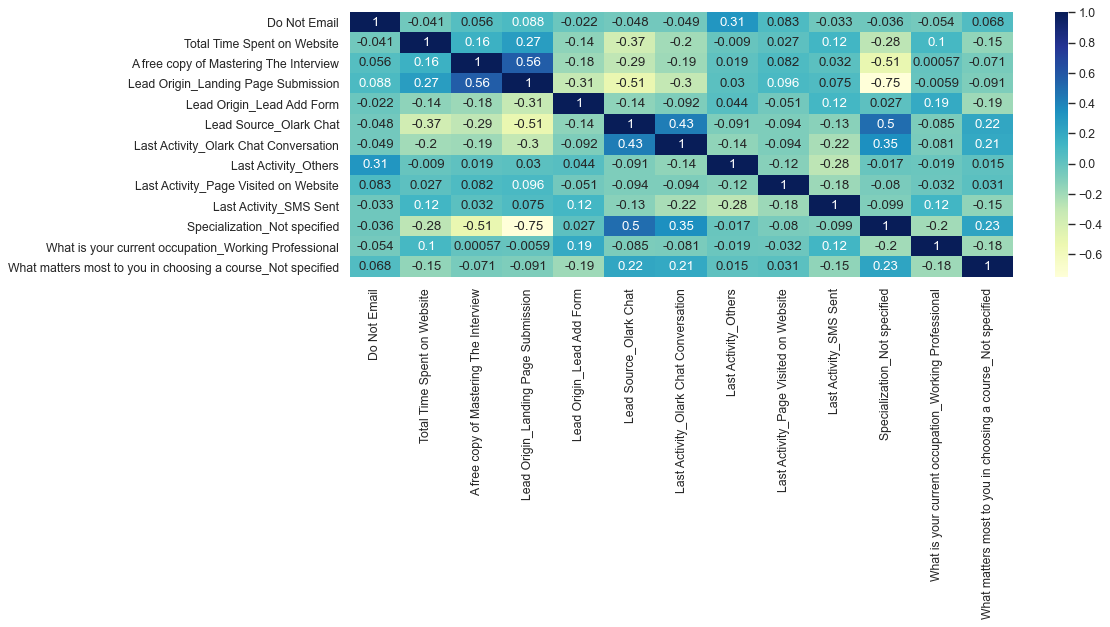

In [95]:
plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Inferences
- All the coorelation coefficeants are in the range -0.75 to 0.75.
- <font color = blue>All variables have p-value < = 0.001. </font>
- <font color = blue>All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.</font>

### So we need not drop any more variables and we can proceed with making predictions using this model only

## 5.4 Calculate the Predicted value for Trainning

In [96]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

1871    0.523536
6795    0.105109
3516    0.345703
8105    0.836345
3934    0.300918
4844    0.989740
3297    0.121124
8071    0.989755
987     0.102801
7423    0.900767
dtype: float64

array([0.52353581, 0.10510915, 0.34570314, 0.83634469, 0.30091763,
       0.98973979, 0.12112437, 0.98975465, 0.10280055, 0.90076704])

#### Creating a dataframe with the actual converted and the predicted probabilities

In [97]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID
0,0,0.523536,1871
1,0,0.105109,6795
2,0,0.345703,3516
3,0,0.836345,8105
4,0,0.300918,3934


#### Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

In [98]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted
0,0,0.523536,1871,1
1,0,0.105109,6795,0
2,0,0.345703,3516,0
3,0,0.836345,8105,1
4,0,0.300918,3934,0


## 5.5 Confusion Matrix

In [99]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3550  452]
 [ 710 1756]]


### Acuracy

In [100]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8203463203463204


## 6. Model Evaluation Matrix

In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print('Accuracy: ', round(100*(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)), 2))
print('Sensitivity: ', round(100*(TP / float(TP+FN)), 2))
print('Specificity: ', round(100*(TN / float(TN+FP)), 2))
print('False positive rate: ', round(100*(FP/ float(TN+FP)), 2))
print('Positive predictive value: ', round(100*(TP / float(TP+FP)), 2))
print('Negative predictive value: ', round(100*(TN / float(TN+FN)), 2))
print('Precision: ', round(100*(TP / float(TP + FP)), 2))
print('Recall: ', round(100*(TP / float(TP + FN)), 2))

Accuracy:  82.03
Sensitivity:  71.21
Specificity:  88.71
False positive rate:  11.29
Positive predictive value:  79.53
Negative predictive value:  83.33
Precision:  79.53
Recall:  71.21


## 7. ROC Curve
A ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [102]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

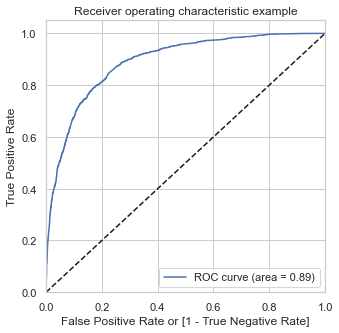

In [104]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

In [105]:
### 
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

auc = auc_val(fpr,tpr)
auc

0.8904187403459684

## 8. Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [106]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/40 for x in range(40)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted,0.0,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975
0,0,0.523536,1871,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.105109,6795,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.345703,3516,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.836345,8105,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
4,0,0.300918,3934,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975]
#num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

        prob  accuracy     sensi     speci
0.000  0.000  0.381262  1.000000  0.000000
0.025  0.025  0.418522  0.999594  0.060470
0.050  0.050  0.515615  0.993106  0.221389
0.075  0.075  0.570501  0.984590  0.315342
0.100  0.100  0.625696  0.973236  0.411544
0.125  0.125  0.685374  0.957826  0.517491
0.150  0.150  0.715523  0.944039  0.574713
0.175  0.175  0.741187  0.927007  0.626687
0.200  0.200  0.760823  0.917275  0.664418
0.225  0.225  0.773655  0.902676  0.694153
0.250  0.250  0.782622  0.894972  0.713393
0.275  0.275  0.790043  0.882806  0.732884
0.300  0.300  0.794991  0.870641  0.748376
0.325  0.325  0.803185  0.818329  0.793853
0.350  0.350  0.808442  0.803325  0.811594
0.375  0.375  0.814317  0.789943  0.829335
0.400  0.400  0.816481  0.772101  0.843828
0.425  0.425  0.815708  0.751419  0.855322
0.450  0.450  0.818955  0.739254  0.868066
0.475  0.475  0.820501  0.727494  0.877811
0.500  0.500  0.820346  0.712084  0.887056
0.525  0.525  0.816172  0.685726  0.896552
0.550  0.55

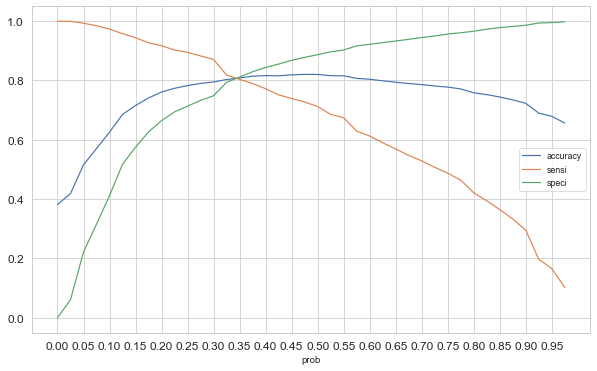

In [108]:
# Slightly alter the figure size to make it more horizontal.
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show();

## 9. Final prediction based on 0.34 cut-off

In [109]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted,0.0,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,final_predicted
0,0,0.523536,1871,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0.105109,6795,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.345703,3516,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0.836345,8105,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
4,0,0.300918,3934,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_train

array([[3223,  779],
       [ 473, 1993]], dtype=int64)

In [111]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives
print('Accuracy: ', round(100*(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)), 2))
print('Sensitivity: ', round(100*(TP / float(TP+FN)), 2))
print('Specificity: ', round(100*(TN / float(TN+FP)), 2))
print('False positive rate: ', round(100*(FP/ float(TN+FP)), 2))
print('Positive predictive value: ', round(100*(TP / float(TP+FP)), 2))
print('Negative predictive value: ', round(100*(TN / float(TN+FN)), 2))
print('Precision: ', round(100*(TP / float(TP + FP)), 2))
print('Recall: ', round(100*(TP / float(TP + FN)), 2))

Accuracy:  82.03
Sensitivity:  80.82
Specificity:  80.53
False positive rate:  19.47
Positive predictive value:  71.9
Negative predictive value:  87.2
Precision:  71.9
Recall:  80.82


## 9.1 Precision and recall trade-off

In [112]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

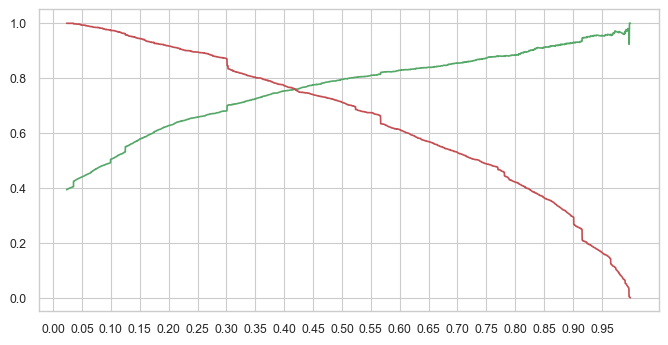

In [113]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show();

### Inferences
- Higher the precision lower the Recall and vice versa.
- We will take our previous cutoff i.e 0.34 as we have a good model with high accuracy and sensitivity. 

## 10. Making predictions on test data

In [114]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Specialization_Not specified',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Not specified'],
      dtype='object')

In [115]:
#Scaling.
X_test[number_features[1:]] = scaler.transform(X_test[number_features[1:]])
X_test = X_test[col]
X_test.head()


,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Not specified,What is your current occupation_Working Professional,What matters most to you in choosing a course_Not specified
4269,0,0.964504,0,0,0,0,0,0,0,1,1,0,1
2376,0,-0.885371,0,0,1,0,0,0,0,1,1,0,0
7766,0,-0.777416,0,0,0,0,0,1,0,0,0,1,0
9199,0,-0.885371,0,0,0,1,1,0,0,0,1,0,0
4359,0,-0.885371,0,0,1,0,0,0,0,0,0,0,0


In [116]:
X_test.shape

(2772, 13)

In [117]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})
y_pred_final = y_pred_final[['LeadID','Converted','Conv_Prob']]
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,4269,1,0.508835,1
1,2376,1,0.915680,1
2,7766,1,0.695095,1
3,9199,0,0.099468,0
4,4359,1,0.901173,1


## 10.1 Check the Metrices 

In [118]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives
print('Accuracy: ', round(100*(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)), 2))
print('Sensitivity: ', round(100*(TP / float(TP+FN)), 2))
print('Specificity: ', round(100*(TN / float(TN+FP)), 2))
print('False positive rate: ', round(100*(FP/ float(TN+FP)), 2))
print('Positive predictive value: ', round(100*(TP / float(TP+FP)), 2))
print('Negative predictive value: ', round(100*(TN / float(TN+FN)), 2))
print('Precision: ', round(100*(TP / float(TP + FP)), 2))
print('Recall: ', round(100*(TP / float(TP + FN)), 2))

array([[1352,  325],
       [ 218,  877]], dtype=int64)

Accuracy:  80.41
Sensitivity:  80.09
Specificity:  80.62
False positive rate:  19.38
Positive predictive value:  72.96
Negative predictive value:  86.11
Precision:  72.96
Recall:  80.09


### Calculating the Area Under the Curve

In [119]:
auc = auc_val(fpr,tpr)
auc

0.8904187403459684

***An AUC can be classed as follows,***

 - 0.90 - 1.00 = excellent
 - 0.80 - 0.90 = good
 - 0.70 - 0.80 = fair
 - 0.60 - 0.70 = poor
 - 0.50 - 0.60 = fail
 
***Since we got a value of 0.890, our model seems to be doing well on the test dataset.***

## 11.Creating the Final dataset & add the lead score 
### Lead Score = 100 * ConversionProbability

#### This needs to be calculated for all the leads from the original dataset (train + test)

In [120]:
y_train_pred_final = y_train_pred_final[['LeadID', 'Converted', 'Conv_Prob', 'predicted']]
y_train_pred_final['final_predicted'] = y_train_pred_final['predicted']
y_train_pred_final = y_train_pred_final.drop(['predicted'], axis = 1) 
lead_data_pred = y_train_pred_final.append(y_pred_final)
lead_data_pred['Lead_Score'] = lead_data_pred['Conv_Prob'].apply(lambda x : round(x*100))
lead_data_pred = lead_data_pred.sort_values('Lead_Score', axis = 0, ascending = False)
lead_data_pred.head(20)

,LeadID,Converted,Conv_Prob,final_predicted,Lead_Score
2357,3723,1,0.996777,1,100
4891,8074,1,0.999177,1,100
5672,6751,1,0.998422,1,100
2604,3287,1,0.996777,1,100
745,6383,1,0.997942,1,100
111,5815,1,0.995705,1,100
196,5793,1,0.996777,1,100
6175,6179,1,0.995098,1,100
1976,4775,1,0.996777,1,100
5657,3078,1,0.996777,1,100


In [121]:
lead_data_pred.shape

(9240, 5)

In [122]:
## Adding vack the lead number 
lead_data_pred['Lead Number'] = lead_info_X
lead_data_pred.head()

,LeadID,Converted,Conv_Prob,final_predicted,Lead_Score,Lead Number
2357,3723,1,0.996777,1,100,637044
4891,8074,1,0.999177,1,100,613046
5672,6751,1,0.998422,1,100,606507
2604,3287,1,0.996777,1,100,634594
745,6383,1,0.997942,1,100,652725


## 12.Determining Feature Importance of Final Model

In [123]:
# coefficients of our final model 

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                                  -1.07
Total Time Spent on Website                                    1.06
A free copy of Mastering The Interview                        -0.29
Lead Origin_Landing Page Submission                           -0.87
Lead Origin_Lead Add Form                                      3.20
Lead Source_Olark Chat                                         1.09
Last Activity_Olark Chat Conversation                         -1.36
Last Activity_Others                                          -0.71
Last Activity_Page Visited on Website                         -0.48
Last Activity_SMS Sent                                         1.11
Specialization_Not specified                                  -0.94
What is your current occupation_Working Professional           2.41
What matters most to you in choosing a course_Not specified   -1.10
dtype: float64

In [124]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                                  -33.29
Total Time Spent on Website                                    33.01
A free copy of Mastering The Interview                         -8.98
Lead Origin_Landing Page Submission                           -27.11
Lead Origin_Lead Add Form                                     100.00
Lead Source_Olark Chat                                         33.90
Last Activity_Olark Chat Conversation                         -42.49
Last Activity_Others                                          -22.21
Last Activity_Page Visited on Website                         -15.10
Last Activity_SMS Sent                                         34.73
Specialization_Not specified                                  -29.27
What is your current occupation_Working Professional           75.34
What matters most to you in choosing a course_Not specified   -34.46
dtype: float64

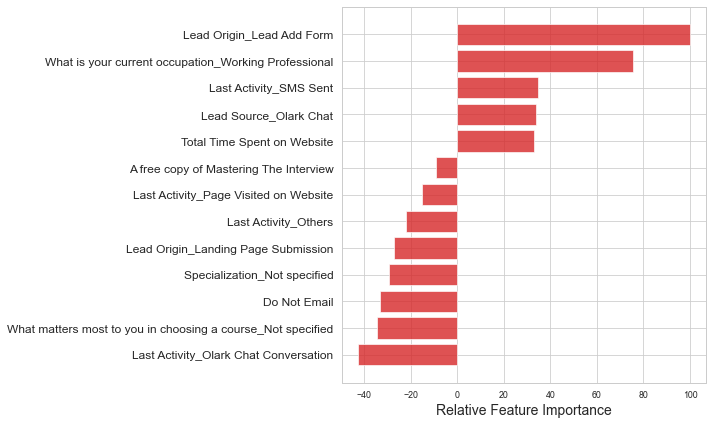

In [125]:
# Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show();

In [126]:
feature_importance_df = pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False)
feature_importance_df = feature_importance_df.rename(columns={'index':'Variables', 0:'Relative coeffient value'})
feature_importance_df = feature_importance_df.reset_index(drop=True)
feature_importance_df.head(3)

,Variables,Relative coeffient value
0,Lead Origin_Lead Add Form,100.00
1,What is your current occupation_Working Profes...,75.34
2,Last Activity_SMS Sent,34.73


### Inferences
- Lead Origin_Lead Add Form - This has 100 coefficient value
- What is your current occupation_Working Professional - It has 75.34 coefficient value
- Last Activity_SMS Sent - It has 34.73 coefficient value

In [127]:
#Finding the Hot leads -> Lead_Score >= 80.
Hot_leads = lead_data_pred[lead_data_pred.Lead_Score >= 80].sort_values(by='Lead_Score',ascending = False)
Hot_leads

,LeadID,Converted,Conv_Prob,final_predicted,Lead_Score,Lead Number
2357,3723,1,1.00,1,100,637044
1000,2764,1,1.00,1,100,649442
1880,8106,1,1.00,1,100,641324
794,5784,1,1.00,1,100,652104
3616,8080,1,1.00,1,100,625850
...,...,...,...,...,...,...
3810,8100,1,0.80,1,80,623548
3441,2923,1,0.80,1,80,627354
4207,7737,0,0.80,1,80,619506
4699,4926,1,0.80,1,80,614708


## 13. Conclusion 

Overall, we produced a promising model with more 82.03% accuracy and 80.82% sensitivity in train and test datasets. As part of our systematics evaluation process steps, we started with data cleaning, then Imputed the missing values, medium capped the outliers, standardized the variables, dummified the categorical variables, and performed the mixed model approach in logistic regression. In the model building process, we performed the Recursive feature elimination (RFE) with initial 20 variables and then performed the manual logistic regression approach i.e. (P-value/VIF), and eliminated some variables based their p-values/VIFs and also eliminated based on their importance in the model. Finally, we arrived with 13 variables and archived a highly promising result in both train and test data sets. We also evaluated the other matrices and plotted the ROC curve to find out the trade-off between sensitivity and specificity. We have also performed the optimization cut-off at 0.34 and generated all potential matrices for the models. We successfully predicted the lead score and assigned it to the respective leads. We also identified the ‘Hot Leads’ which has a score of more than 80%.

**Below are evidences from Train Dataset:**
- Accuracy:  82.03
- Sensitivity:  80.82
- Specificity:  80.53
- False positive rate:  19.47
- Positive predictive value:  71.9
- Negative predictive value:  87.2
- Precision:  71.9
- Recall:  80.82

**Below are evidences from Test Dataset:**

- Accuracy:  80.41
- Sensitivity:  80.09
- Specificity:  80.62
- False positive rate:  19.38
- Positive predictive value:  72.96
- Negative predictive value:  86.11
- Precision:  72.96
- Recall:  80.09
**Evidence from ROC Curve**
- ROC curve area shows 0.8891 (89%),indicating a good predictive model.